# Etudes des gt: LASSO, RL et étude des corrélations

Le but de ce notebook est d'étudier et de sélectionner les google trends pertinents pour étudier le tourisme par département. Pour cela, on regroupe le nb de touristes par département pour analyser les gt correspondant au département en question. 3 étapes pour cette étude:
- 1: LASSO: sélection des gt pertinents 
- 2: RL sur les gt par département
- 3: étude des corrélations 

In [1]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Lasso
import seaborn as sns

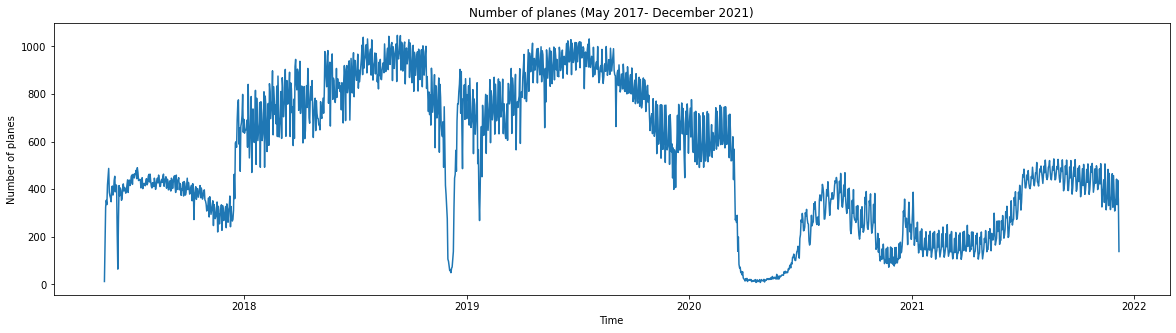

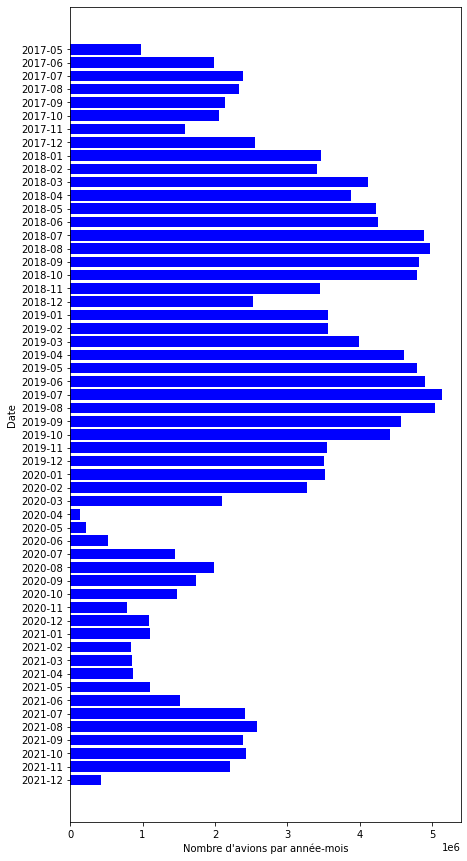

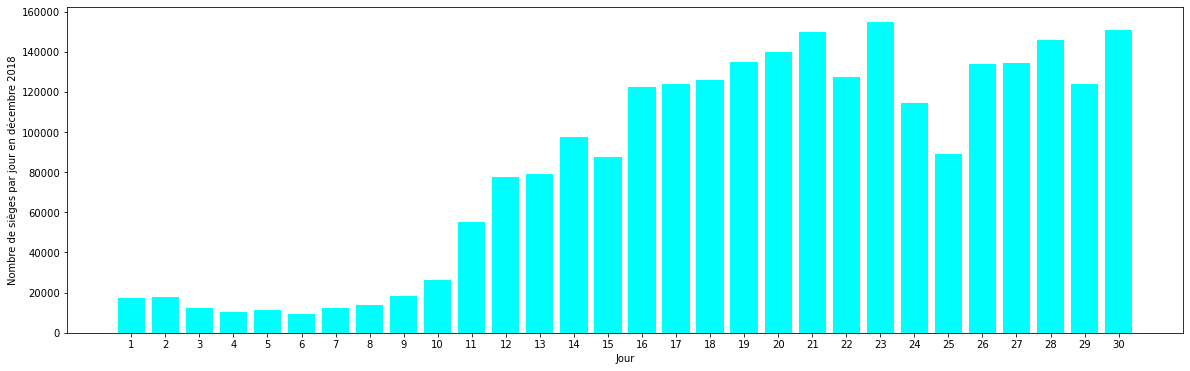

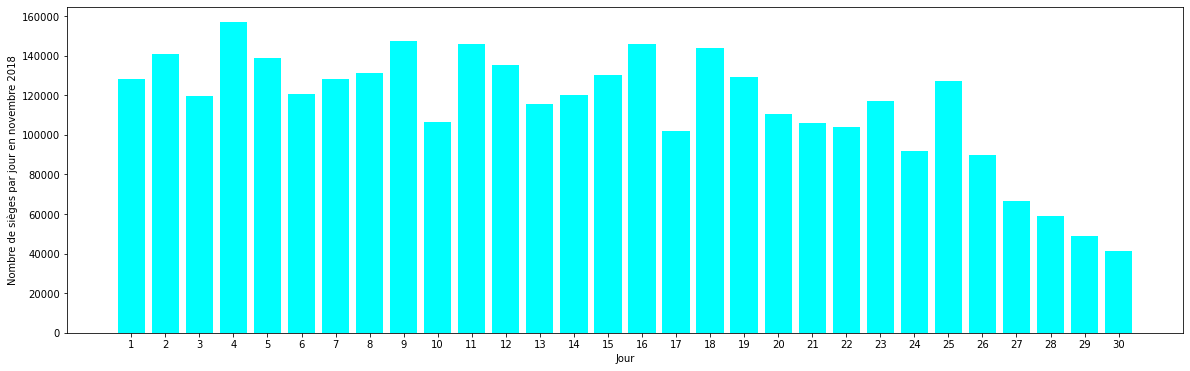

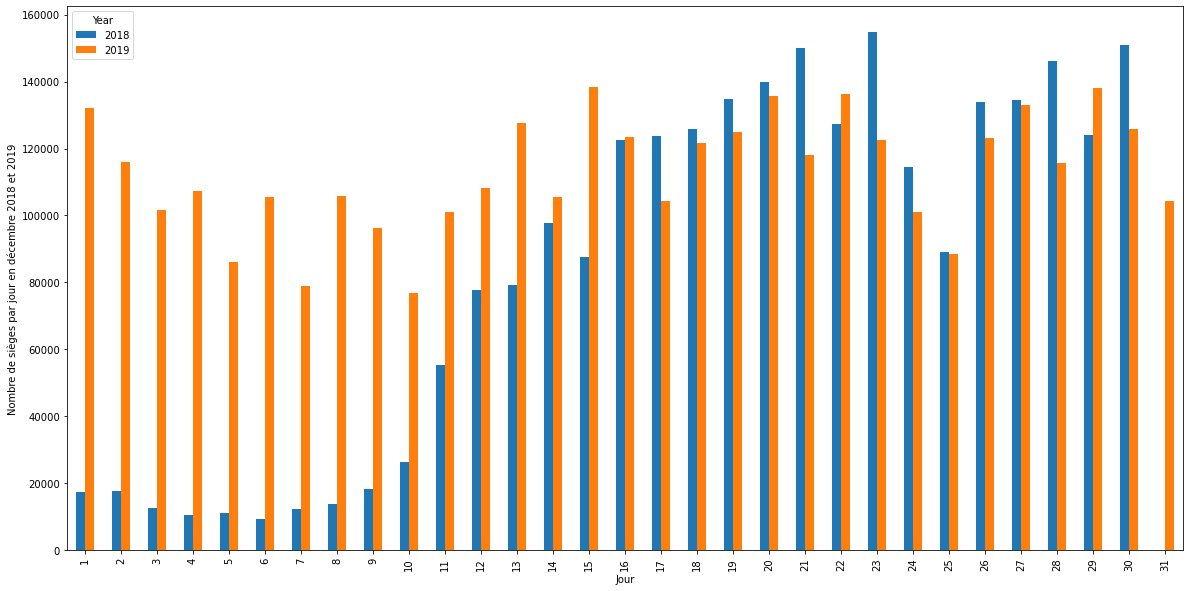

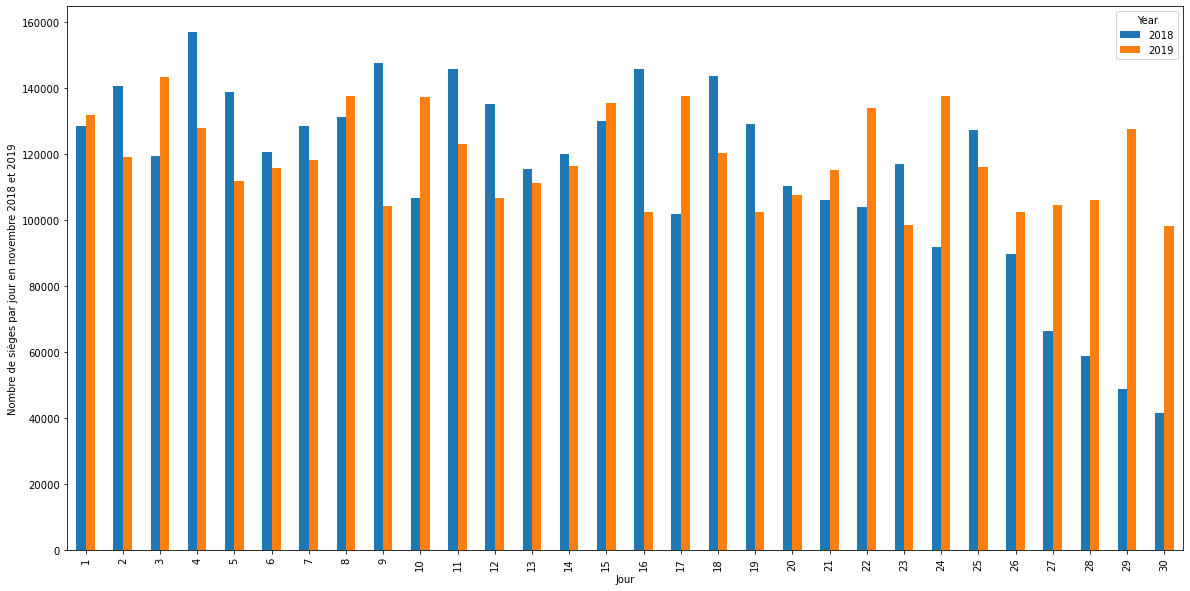

<ipython-input-2-3a4f6729c0f0>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_imput_obs_2019["Year"]=2018
<ipython-input-2-3a4f6729c0f0>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_imput_obs_2019["sheduled_time_start"] = pd.to_datetime(df_imput_obs_2019[['Year', 'Month', 'Day']])
<ipython-input-2-3a4f6729c0f0>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentat

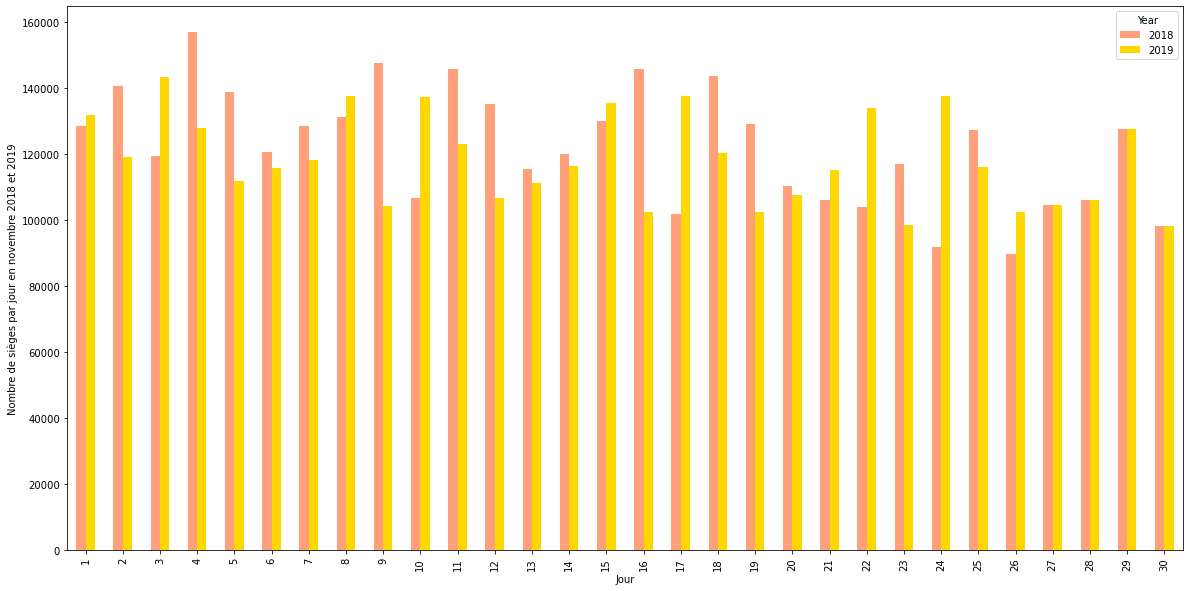

<ipython-input-2-9bdd9c2eca73>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_imput_obs_2019["Year"]=2018
<ipython-input-2-9bdd9c2eca73>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_imput_obs_2019["sheduled_time_start"] = pd.to_datetime(df2_imput_obs_2019[['Year', 'Month', 'Day']])
<ipython-input-2-9bdd9c2eca73>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

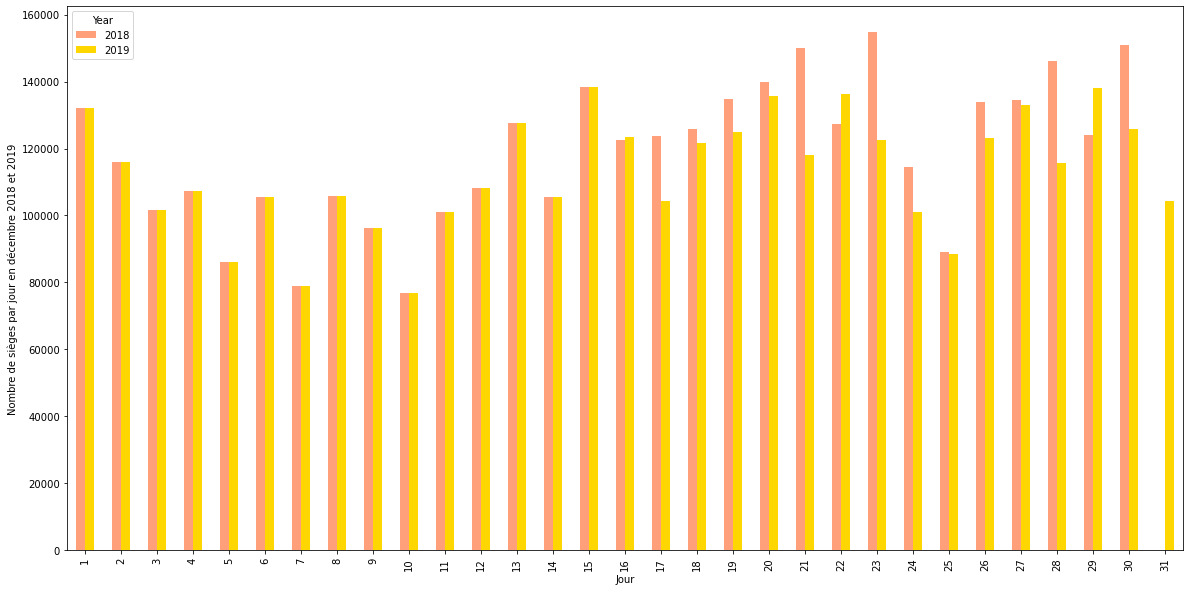

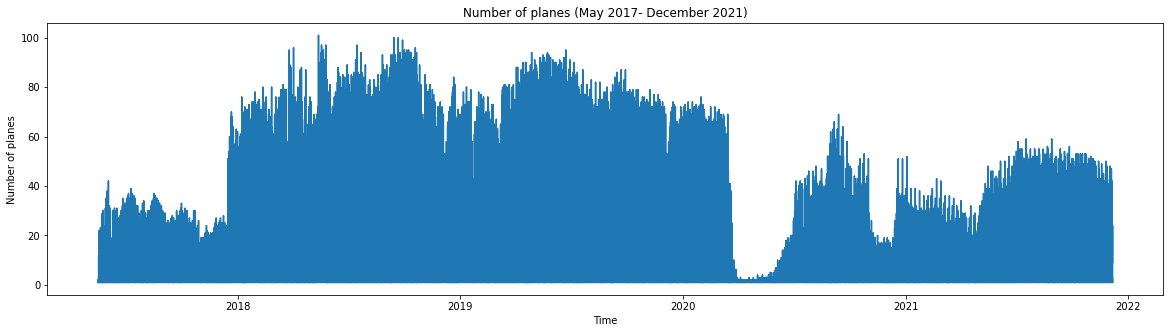

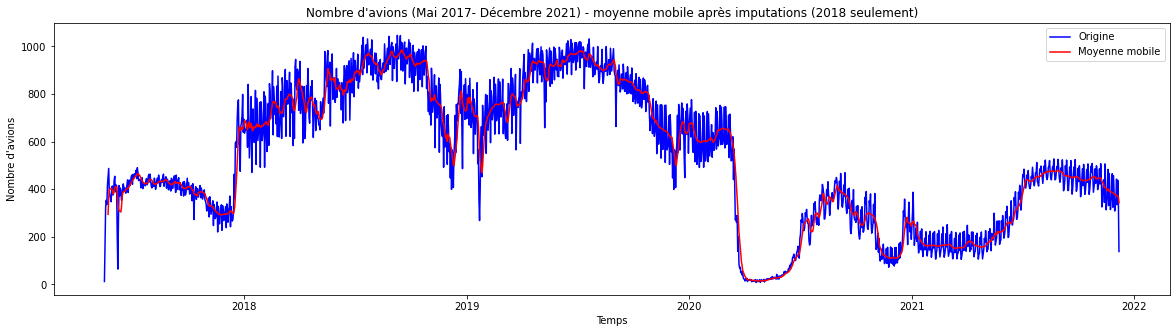

<ipython-input-2-7f0bba5ee52d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_imput_31dec["Year"]=2018
<ipython-input-2-7f0bba5ee52d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_imput_31dec["Month"]=12
<ipython-input-2-7f0bba5ee52d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#return

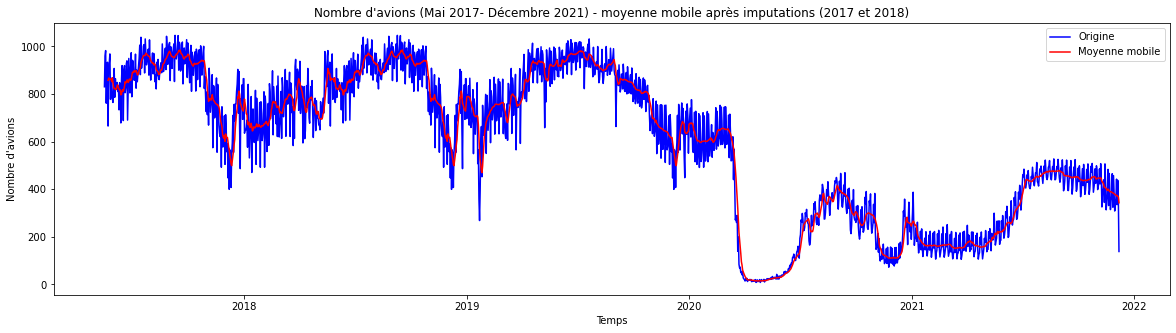

<ipython-input-2-cb2c87f7a7f3>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_air_traffic_month = df_air_traffic_imput2.groupby([pd.Grouper(key='sheduled_time_start', freq="MS"), "citydest"])['seats', 'number_planes'].sum()
<ipython-input-2-323a6f654225>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reviews_france['stay_date']=pd.to_datetime(df_reviews_france['stay_date'])
<ipython-input-2-323a6f654225>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.ht

In [2]:
# J'importe les données transformées
%run "Transformations_donnees.ipynb"

# Travail sur les données

In [3]:
# données google trend standardisées
df_gt6.head(2)

variable,aeroport nice cote d azur theme_cat_voyages,aeroport paris_cat_voyages,cote d azur theme_cat_voyages,disneyland paris hotel_cat_voyages,disneyland paris theme_cat_voyages,disneyland paris_cat_voyages,french riviera_cat_voyages,louvre_cat_voyages,lyon gare_cat_voyages,lyon hotel_cat_voyages,...,nice hotel_cat_voyages,nice_cat_voyages,paris gare_cat_voyages,paris hotel_cat_voyages,paris restaurant_cat_voyages,paris_cat_voyages,promenade des anglais_cat_voyages,Year-Month,Year,Month
0,0.380821,0.397343,0.218335,0.658764,0.675476,0.703867,0.113660,0.453864,0.402707,0.736345,...,0.375507,0.311773,0.450731,0.727737,0.746280,0.688695,0.042035,2017-01-01,2017,1
1,0.397884,0.668512,0.286189,0.444575,0.637644,0.631116,0.176885,0.163524,0.521349,0.688254,...,0.649218,0.435043,0.860878,0.723169,0.555221,0.647908,0.048989,2017-02-01,2017,2


####  Paris

In [4]:
# données officielles pour paris
df_Official_Data_Paris = df_France_Official_Data2[df_France_Official_Data2['department']=='Paris']

In [5]:
# gt paris + disenyland paris
df_gt6_paris=df_gt6.drop(["marseille gare_cat_voyages", "marseille hotel_cat_voyages", "marseille restaurant_cat_voyages","mucem theme","marseille vieux port_cat_voyages", "nice airport_cat_voyages","marseille_cat_voyages", "marseille station_cat_voyages","lyon_cat_voyages","aeroport nice cote d azur theme_cat_voyages","cote d azur theme_cat_voyages", "french riviera_cat_voyages","lyon gare_cat_voyages","lyon hotel_cat_voyages","nice hotel_cat_voyages","nice_cat_voyages", "promenade des anglais_cat_voyages","Year","Month"], axis=1)

In [6]:
# je rends le format compatible pour faire une fusion
df_gt6_paris['Year-Month']=pd.to_datetime(df_gt6_paris['Year-Month'], errors='coerce')
df_gt6_paris.rename(columns={"Year-Month": "date"}, inplace=True)

In [7]:
# je merge mes bdd
df_paris=df_Official_Data_Paris.merge(df_gt6_paris, on="date", how="inner")

In [8]:
# je supprime toutes les variables non numériques
df_paris=df_paris.drop(["date", "department"], axis=1)
df_paris.head()

,value_in_thousands,aeroport paris_cat_voyages,disneyland paris hotel_cat_voyages,disneyland paris theme_cat_voyages,disneyland paris_cat_voyages,louvre_cat_voyages,paris gare_cat_voyages,paris hotel_cat_voyages,paris restaurant_cat_voyages,paris_cat_voyages
0,1186.08,0.397343,0.658764,0.675476,0.703867,0.453864,0.450731,0.727737,0.746280,0.688695
1,1073.42,0.668512,0.444575,0.637644,0.631116,0.163524,0.860878,0.723169,0.555221,0.647908
2,1361.99,0.175265,0.592372,0.615289,0.621114,0.712439,0.437975,0.706606,0.513693,0.615938
3,1340.15,0.654394,0.357520,0.748321,0.593453,0.586943,0.576582,0.674831,0.596839,0.746915
4,1369.79,0.682465,0.354153,0.595350,0.660548,0.419978,0.618393,0.582283,0.522685,0.752421


#### Lyon

In [9]:
# données officielles pour lyon
df_Official_Data_Lyon = df_France_Official_Data2[df_France_Official_Data2['department']=='Rhône']
df_Official_Data_Lyon.head(5)

,date,department,value_in_thousands
76,2011-01-01,Rhône,216.36
172,2011-02-01,Rhône,224.10
268,2011-03-01,Rhône,234.60
364,2011-04-01,Rhône,236.67
460,2011-05-01,Rhône,250.99


In [10]:
# je sélectionne les gt
df_gt6_lyon=df_gt6[["Year-Month","lyon gare_cat_voyages", "lyon hotel_cat_voyages"]]
df_gt6_lyon.head(5)

variable,Year-Month,lyon gare_cat_voyages,lyon hotel_cat_voyages
0,2017-01-01,0.402707,0.736345
1,2017-02-01,0.521349,0.688254
2,2017-03-01,0.482256,0.644683
3,2017-04-01,0.483234,0.617882
4,2017-05-01,0.512461,0.528303


In [11]:
# je rends le format compatible pour faire une fusion
df_gt6_lyon['Year-Month']=pd.to_datetime(df_gt6_lyon['Year-Month'], errors='coerce')
df_gt6_lyon.rename(columns={"Year-Month": "date"}, inplace=True)

<ipython-input-11-09f6f8de07e8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_gt6_lyon['Year-Month']=pd.to_datetime(df_gt6_lyon['Year-Month'], errors='coerce')
C:\Users\julie\anaconda3\lib\site-packages\pandas\core\frame.py:4296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [12]:
# je merge mes bdd
df_lyon=df_Official_Data_Lyon.merge(df_gt6_lyon, on="date", how="inner")

In [13]:
# je supprime toutes les variables non numériques
df_lyon=df_lyon.drop(["date", "department"], axis=1)
df_lyon.head()

,value_in_thousands,lyon gare_cat_voyages,lyon hotel_cat_voyages
0,265.37,0.402707,0.736345
1,268.68,0.521349,0.688254
2,296.72,0.482256,0.644683
3,306.39,0.483234,0.617882
4,293.33,0.512461,0.528303


#### Marseille

In [14]:
# données officielles pour marseille
df_Official_Data_Marseille = df_France_Official_Data2[df_France_Official_Data2['department']=='Bouches-du-Rhône']

# sélection des google trends
df_gt6_marseille=df_gt6[["Year-Month","marseille gare_cat_voyages", "marseille hotel_cat_voyages", "marseille restaurant_cat_voyages","mucem theme","marseille vieux port_cat_voyages","marseille station_cat_voyages", "marseille_cat_voyages"]]

# je rends le format compatible pour faire une fusion
df_gt6_marseille['Year-Month']=pd.to_datetime(df_gt6_marseille['Year-Month'], errors='coerce')
df_gt6_marseille.rename(columns={"Year-Month": "date"}, inplace=True)

# je merge mes bdd
df_marseille=df_Official_Data_Marseille.merge(df_gt6_marseille, on="date", how="inner")

# je supprime toutes les variables non numériques
df_marseille=df_marseille.drop(["date", "department"], axis=1)
df_marseille.head(4)

<ipython-input-14-79cbf8cb6f9f>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_gt6_marseille['Year-Month']=pd.to_datetime(df_gt6_marseille['Year-Month'], errors='coerce')
C:\Users\julie\anaconda3\lib\site-packages\pandas\core\frame.py:4296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,value_in_thousands,marseille gare_cat_voyages,marseille hotel_cat_voyages,marseille restaurant_cat_voyages,mucem theme,marseille vieux port_cat_voyages,marseille station_cat_voyages,marseille_cat_voyages
0,192.15,0.207856,0.345557,0.098430,0.214809,0.264645,0.482262,0.532138
1,187.67,0.220536,0.292903,0.184658,0.602305,0.284941,0.307676,0.488880
2,245.67,0.275149,0.325272,0.100641,0.506013,0.294920,0.285046,0.551107
3,325.04,0.369812,0.338550,0.248035,0.530020,0.300991,0.053767,0.573537


#### Alpes-maritimes - Nice

In [15]:
# données officielles pour nice
df_Official_Data_Nice = df_France_Official_Data2[df_France_Official_Data2['department']=='Alpes-Maritimes']

# sélection des google trends
df_gt6_nice=df_gt6[["Year-Month","nice airport_cat_voyages","aeroport nice cote d azur theme_cat_voyages","cote d azur theme_cat_voyages", "french riviera_cat_voyages","nice hotel_cat_voyages","nice_cat_voyages", "promenade des anglais_cat_voyages"]]

# je rends le format compatible pour faire une fusion
df_gt6_nice['Year-Month']=pd.to_datetime(df_gt6_nice['Year-Month'], errors='coerce')
df_gt6_nice.rename(columns={"Year-Month": "date"}, inplace=True)

# je merge mes bdd
df_nice=df_Official_Data_Nice.merge(df_gt6_nice, on="date", how="inner")

# je supprime toutes les variables non numériques
df_nice=df_nice.drop(["date", "department"], axis=1)
df_nice.head(4)

<ipython-input-15-18637f1273d2>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_gt6_nice['Year-Month']=pd.to_datetime(df_gt6_nice['Year-Month'], errors='coerce')
C:\Users\julie\anaconda3\lib\site-packages\pandas\core\frame.py:4296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,value_in_thousands,nice airport_cat_voyages,aeroport nice cote d azur theme_cat_voyages,cote d azur theme_cat_voyages,french riviera_cat_voyages,nice hotel_cat_voyages,nice_cat_voyages,promenade des anglais_cat_voyages
0,177.22,0.282935,0.380821,0.218335,0.113660,0.375507,0.311773,0.042035
1,202.70,0.269345,0.397884,0.286189,0.176885,0.649218,0.435043,0.048989
2,265.28,0.412951,0.581424,0.382997,0.470835,0.517624,0.521424,0.055310
3,376.12,0.300942,0.547968,0.463015,0.830587,0.481717,0.558308,0.079215


#### Seine-et-marne

In [16]:
# données officielles pour nice
df_Official_Data_Seine = df_France_Official_Data2[df_France_Official_Data2['department']=='Seine-et-Marne']

# sélection des google trends
df_gt6_seine=df_gt6[["Year-Month","disneyland paris hotel_cat_voyages","disneyland paris theme_cat_voyages", "disneyland paris_cat_voyages"]]
# je rends le format compatible pour faire une fusion
df_gt6_seine['Year-Month']=pd.to_datetime(df_gt6_seine['Year-Month'], errors='coerce')
df_gt6_seine.rename(columns={"Year-Month": "date"}, inplace=True)

# je merge mes bdd
df_seine=df_Official_Data_Seine.merge(df_gt6_seine, on="date", how="inner")

# je supprime toutes les variables non numériques
df_seine=df_seine.drop(["date", "department"], axis=1)
df_seine.head(4)

<ipython-input-16-8bc65042d5d1>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_gt6_seine['Year-Month']=pd.to_datetime(df_gt6_seine['Year-Month'], errors='coerce')
C:\Users\julie\anaconda3\lib\site-packages\pandas\core\frame.py:4296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,value_in_thousands,disneyland paris hotel_cat_voyages,disneyland paris theme_cat_voyages,disneyland paris_cat_voyages
0,370.52,0.658764,0.675476,0.703867
1,357.79,0.444575,0.637644,0.631116
2,391.69,0.592372,0.615289,0.621114
3,443.26,0.357520,0.748321,0.593453


# PARIS

## LASSO pour la sélection des google trends parisiennes

In [17]:
# je définis mon vecteur cible y ( à prédire) et mes variables (X, les google trends) 
# et je les convertis en vecteur pour pouvoir appliquer le Lasso
y=df_paris["value_in_thousands"].to_numpy()
X=df_paris.drop(["value_in_thousands"], axis = 1).to_numpy()

In [18]:
# je sépare mon échantillon
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=12)

In [19]:
# j'implémente le modèle LASSO
pipeline = Pipeline([
                     ('scaler',StandardScaler()),
                     ('model',Lasso())
])

In [20]:
# on veut optimiser notre hyperparamètre alpha
search = GridSearchCV(pipeline,
                      {'model__alpha':np.arange(0.1,10,0.1)},
                      cv = 5, scoring="neg_mean_squared_error",verbose=3
                      )

### Entraînement du modèle

In [21]:
search.fit(X_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


Fitting 5 folds for each of 99 candidates, totalling 495 fits
[CV] model__alpha=0.1 ................................................
[CV] .............. model__alpha=0.1, score=-222616.256, total=   0.0s
[CV] model__alpha=0.1 ................................................
[CV] .............. model__alpha=0.1, score=-229259.006, total=   0.0s
[CV] model__alpha=0.1 ................................................
[CV] ............... model__alpha=0.1, score=-29161.516, total=   0.0s
[CV] model__alpha=0.1 ................................................
[CV] .............. model__alpha=0.1, score=-126997.199, total=   0.0s
[CV] model__alpha=0.1 ................................................
[CV] .............. model__alpha=0.1, score=-177472.362, total=   0.0s
[CV] model__alpha=0.2 ................................................
[CV] .............. model__alpha=0.2, score=-223167.107, total=   0.0s
[CV] model__alpha=0.2 ................................................
[CV] ..........

[CV]  model__alpha=1.2000000000000002, score=-167508.019, total=   0.0s
[CV] model__alpha=1.3000000000000003 .................................
[CV]  model__alpha=1.3000000000000003, score=-229160.733, total=   0.0s
[CV] model__alpha=1.3000000000000003 .................................
[CV]  model__alpha=1.3000000000000003, score=-210568.386, total=   0.0s
[CV] model__alpha=1.3000000000000003 .................................
[CV]  model__alpha=1.3000000000000003, score=-28392.491, total=   0.0s
[CV] model__alpha=1.3000000000000003 .................................
[CV]  model__alpha=1.3000000000000003, score=-120471.211, total=   0.0s
[CV] model__alpha=1.3000000000000003 .................................
[CV]  model__alpha=1.3000000000000003, score=-166663.988, total=   0.0s
[CV] model__alpha=1.4000000000000001 .................................
[CV]  model__alpha=1.4000000000000001, score=-229716.668, total=   0.0s
[CV] model__alpha=1.4000000000000001 .................................


[CV]  model__alpha=2.5000000000000004, score=-236006.586, total=   0.0s
[CV] model__alpha=2.5000000000000004 .................................
[CV]  model__alpha=2.5000000000000004, score=-196739.494, total=   0.0s
[CV] model__alpha=2.5000000000000004 .................................
[CV]  model__alpha=2.5000000000000004, score=-27454.227, total=   0.0s
[CV] model__alpha=2.5000000000000004 .................................
[CV]  model__alpha=2.5000000000000004, score=-114160.696, total=   0.0s
[CV] model__alpha=2.5000000000000004 .................................
[CV]  model__alpha=2.5000000000000004, score=-157375.994, total=   0.0s
[CV] model__alpha=2.6 ................................................
[CV] .............. model__alpha=2.6, score=-236593.315, total=   0.0s
[CV] model__alpha=2.6 ................................................
[CV] .............. model__alpha=2.6, score=-195803.459, total=   0.0s
[CV] model__alpha=2.6 ................................................
[C

[CV]  model__alpha=3.8000000000000003, score=-26374.048, total=   0.0s
[CV] model__alpha=3.8000000000000003 .................................
[CV]  model__alpha=3.8000000000000003, score=-107760.822, total=   0.0s
[CV] model__alpha=3.8000000000000003 .................................
[CV]  model__alpha=3.8000000000000003, score=-149089.087, total=   0.0s
[CV] model__alpha=3.9000000000000004 .................................
[CV]  model__alpha=3.9000000000000004, score=-242760.145, total=   0.0s
[CV] model__alpha=3.9000000000000004 .................................
[CV]  model__alpha=3.9000000000000004, score=-193225.564, total=   0.0s
[CV] model__alpha=3.9000000000000004 .................................
[CV]  model__alpha=3.9000000000000004, score=-26297.027, total=   0.0s
[CV] model__alpha=3.9000000000000004 .................................
[CV]  model__alpha=3.9000000000000004, score=-107285.397, total=   0.0s
[CV] model__alpha=3.9000000000000004 .................................
[

[CV] .............. model__alpha=5.2, score=-139328.078, total=   0.0s
[CV] model__alpha=5.3 ................................................
[CV] .............. model__alpha=5.3, score=-250616.595, total=   0.0s
[CV] model__alpha=5.3 ................................................
[CV] .............. model__alpha=5.3, score=-191952.146, total=   0.0s
[CV] model__alpha=5.3 ................................................
[CV] ............... model__alpha=5.3, score=-25317.997, total=   0.0s
[CV] model__alpha=5.3 ................................................
[CV] .............. model__alpha=5.3, score=-100926.136, total=   0.0s
[CV] model__alpha=5.3 ................................................
[CV] .............. model__alpha=5.3, score=-138606.634, total=   0.0s
[CV] model__alpha=5.4 ................................................
[CV] .............. model__alpha=5.4, score=-251201.417, total=   0.0s
[CV] model__alpha=5.4 ................................................
[CV] .

[CV] .............. model__alpha=6.5, score=-130198.138, total=   0.0s
[CV] model__alpha=6.6 ................................................
[CV] .............. model__alpha=6.6, score=-258452.700, total=   0.0s
[CV] model__alpha=6.6 ................................................
[CV] .............. model__alpha=6.6, score=-190922.231, total=   0.0s
[CV] model__alpha=6.6 ................................................
[CV] ............... model__alpha=6.6, score=-24571.414, total=   0.0s
[CV] model__alpha=6.6 ................................................
[CV] ............... model__alpha=6.6, score=-95477.331, total=   0.0s
[CV] model__alpha=6.6 ................................................
[CV] .............. model__alpha=6.6, score=-129518.926, total=   0.0s
[CV] model__alpha=6.7 ................................................
[CV] .............. model__alpha=6.7, score=-259075.465, total=   0.0s
[CV] model__alpha=6.7 ................................................
[CV] .

[CV] .............. model__alpha=8.1, score=-260563.256, total=   0.0s
[CV] model__alpha=8.1 ................................................
[CV] .............. model__alpha=8.1, score=-190405.410, total=   0.0s
[CV] model__alpha=8.1 ................................................
[CV] ............... model__alpha=8.1, score=-23652.299, total=   0.0s
[CV] model__alpha=8.1 ................................................
[CV] ............... model__alpha=8.1, score=-90299.138, total=   0.0s
[CV] model__alpha=8.1 ................................................
[CV] .............. model__alpha=8.1, score=-119683.754, total=   0.0s
[CV] model__alpha=8.2 ................................................
[CV] .............. model__alpha=8.2, score=-260403.978, total=   0.0s
[CV] model__alpha=8.2 ................................................
[CV] .............. model__alpha=8.2, score=-190396.947, total=   0.0s
[CV] model__alpha=8.2 ................................................
[CV] .

[CV] .............. model__alpha=9.4, score=-111735.303, total=   0.0s
[CV] model__alpha=9.5 ................................................
[CV] .............. model__alpha=9.5, score=-258475.404, total=   0.0s
[CV] model__alpha=9.5 ................................................
[CV] .............. model__alpha=9.5, score=-190583.070, total=   0.0s
[CV] model__alpha=9.5 ................................................
[CV] ............... model__alpha=9.5, score=-22846.706, total=   0.0s
[CV] model__alpha=9.5 ................................................
[CV] ............... model__alpha=9.5, score=-86891.482, total=   0.0s
[CV] model__alpha=9.5 ................................................
[CV] .............. model__alpha=9.5, score=-111149.270, total=   0.0s
[CV] model__alpha=9.6 ................................................
[CV] .............. model__alpha=9.6, score=-258337.959, total=   0.0s
[CV] model__alpha=9.6 ................................................
[CV] .

[Parallel(n_jobs=1)]: Done 495 out of 495 | elapsed:    4.6s finished


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', Lasso())]),
             param_grid={'model__alpha': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
       1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6,
       2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9,
       4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1, 5.2,
       5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4, 6.5,
       6.6, 6.7, 6.8, 6.9, 7. , 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7, 7.8,
       7.9, 8. , 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9. , 9.1,
       9.2, 9.3, 9.4, 9.5, 9.6, 9.7, 9.8, 9.9])},
             scoring='neg_mean_squared_error', verbose=3)

In [22]:
search.best_params_
# {'model__alpha': 9.9}: le meilleur alpha pour notre modèle c'est 9.9

{'model__alpha': 9.9}

In [23]:
# on obtient les coefficients liés aux différentes variables
coefficients = search.best_estimator_.named_steps['model'].coef_

In [24]:
# on ne garde que les google trends dont l'importance est strictement positive.
# pour l'aléatoire que nous avons fixé, trois google trends sont superflues pour expliquer la série
importance = np.abs(coefficients)
importance

array([ 66.14366214, 236.64625855,   0.        , 227.95035417,
         0.        , 206.20496191,   0.        , 192.04753794,
        51.42366523])

### Test du modèle

In [25]:
search.fit(X_test,y_test)
search.best_params_ 
# alpha = 9.9

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\julie\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1151.1878961082111, tolerance: 438.24546690249997
  model = cd_fast.enet_coordinate_descent(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
C:\Users\julie\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2393.395578820353, tolerance: 357.9629808025
  model = cd_fast.enet_coordinate_descent(


Fitting 5 folds for each of 99 candidates, totalling 495 fits
[CV] model__alpha=0.1 ................................................
[CV] ............... model__alpha=0.1, score=-60570.251, total=   0.0s
[CV] model__alpha=0.1 ................................................
[CV] ............... model__alpha=0.1, score=-52334.734, total=   0.0s
[CV] model__alpha=0.1 ................................................
[CV] ............... model__alpha=0.1, score=-77144.179, total=   0.0s
[CV] model__alpha=0.1 ................................................
[CV] ............... model__alpha=0.1, score=-95607.115, total=   0.0s
[CV] model__alpha=0.1 ................................................
[CV] .............. model__alpha=0.1, score=-166934.047, total=   0.0s
[CV] model__alpha=0.2 ................................................
[CV] ............... model__alpha=0.2, score=-59777.105, total=   0.0s
[CV] model__alpha=0.2 ................................................
[CV] ..........

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
C:\Users\julie\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 26986.45794760059, tolerance: 412.40218351
  model = cd_fast.enet_coordinate_descent(
C:\Users\julie\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3849.9704357841474, tolerance: 320.02571252250004
  model = cd_fast.enet_coordinate_descent(
C:\Users\julie\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 520.503680798487, tolerance: 357.9629808025
  model = cd_fast.enet_coordinate_descent(
C:\Users\julie\anaconda3\lib\site-pa


[CV] ............... model__alpha=0.4, score=-60100.408, total=   0.0s
[CV] model__alpha=0.4 ................................................
[CV] ............... model__alpha=0.4, score=-82046.464, total=   0.0s
[CV] model__alpha=0.4 ................................................
[CV] .............. model__alpha=0.4, score=-146957.114, total=   0.0s
[CV] model__alpha=0.5 ................................................
[CV] ............... model__alpha=0.5, score=-57826.896, total=   0.0s
[CV] model__alpha=0.5 ................................................
[CV] ............... model__alpha=0.5, score=-44672.761, total=   0.0s
[CV] model__alpha=0.5 ................................................
[CV] ............... model__alpha=0.5, score=-55241.322, total=   0.0s
[CV] model__alpha=0.5 ................................................
[CV] ............... model__alpha=0.5, score=-77881.398, total=   0.0s
[CV] model__alpha=0.5 ................................................
[CV] 

C:\Users\julie\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7854.268269840279, tolerance: 412.40218351
  model = cd_fast.enet_coordinate_descent(
C:\Users\julie\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5475.357877099159, tolerance: 412.40218351
  model = cd_fast.enet_coordinate_descent(
C:\Users\julie\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3594.465360674425, tolerance: 412.40218351
  model = cd_fast.enet_coordinate_descent(
C:\Users\julie\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective di


[CV] model__alpha=0.8 ................................................
[CV] ............... model__alpha=0.8, score=-56052.640, total=   0.0s
[CV] model__alpha=0.8 ................................................
[CV] ............... model__alpha=0.8, score=-43159.344, total=   0.0s
[CV] model__alpha=0.8 ................................................
[CV] ............... model__alpha=0.8, score=-43136.393, total=   0.0s
[CV] model__alpha=0.8 ................................................
[CV] ............... model__alpha=0.8, score=-69386.754, total=   0.0s
[CV] model__alpha=0.8 ................................................
[CV] .............. model__alpha=0.8, score=-121784.751, total=   0.0s
[CV] model__alpha=0.9 ................................................
[CV] ............... model__alpha=0.9, score=-55554.506, total=   0.0s
[CV] model__alpha=0.9 ................................................
[CV] ............... model__alpha=0.9, score=-42532.574, total=   0.0s
[CV] 

C:\Users\julie\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1018.5501542180864, tolerance: 412.40218351
  model = cd_fast.enet_coordinate_descent(



[CV] model__alpha=1.1 ................................................
[CV] ............... model__alpha=1.1, score=-41286.828, total=   0.0s
[CV] model__alpha=1.1 ................................................
[CV] ............... model__alpha=1.1, score=-36075.065, total=   0.0s
[CV] model__alpha=1.1 ................................................
[CV] ............... model__alpha=1.1, score=-66629.921, total=   0.0s
[CV] model__alpha=1.1 ................................................
[CV] .............. model__alpha=1.1, score=-113462.739, total=   0.0s
[CV] model__alpha=1.2000000000000002 .................................
[CV]  model__alpha=1.2000000000000002, score=-54018.567, total=   0.0s
[CV] model__alpha=1.2000000000000002 .................................
[CV]  model__alpha=1.2000000000000002, score=-40668.780, total=   0.0s
[CV] model__alpha=1.2000000000000002 .................................
[CV]  model__alpha=1.2000000000000002, score=-37110.845, total=   0.0s
[CV] 

[CV]  model__alpha=2.4000000000000004, score=-57323.019, total=   0.0s
[CV] model__alpha=2.4000000000000004 .................................
[CV]  model__alpha=2.4000000000000004, score=-88325.552, total=   0.0s
[CV] model__alpha=2.5000000000000004 .................................
[CV]  model__alpha=2.5000000000000004, score=-48947.775, total=   0.0s
[CV] model__alpha=2.5000000000000004 .................................
[CV]  model__alpha=2.5000000000000004, score=-33093.726, total=   0.0s
[CV] model__alpha=2.5000000000000004 .................................
[CV]  model__alpha=2.5000000000000004, score=-39228.299, total=   0.0s
[CV] model__alpha=2.5000000000000004 .................................
[CV]  model__alpha=2.5000000000000004, score=-56691.178, total=   0.0s
[CV] model__alpha=2.5000000000000004 .................................
[CV]  model__alpha=2.5000000000000004, score=-86679.648, total=   0.0s
[CV] model__alpha=2.6 ................................................
[CV] .

[CV] ............... model__alpha=3.7, score=-56080.494, total=   0.0s
[CV] model__alpha=3.7 ................................................
[CV] ............... model__alpha=3.7, score=-66505.123, total=   0.0s
[CV] model__alpha=3.8000000000000003 .................................
[CV]  model__alpha=3.8000000000000003, score=-46908.959, total=   0.0s
[CV] model__alpha=3.8000000000000003 .................................
[CV]  model__alpha=3.8000000000000003, score=-26361.259, total=   0.0s
[CV] model__alpha=3.8000000000000003 .................................
[CV]  model__alpha=3.8000000000000003, score=-37479.470, total=   0.0s
[CV] model__alpha=3.8000000000000003 .................................
[CV]  model__alpha=3.8000000000000003, score=-56112.188, total=   0.0s
[CV] model__alpha=3.8000000000000003 .................................
[CV]  model__alpha=3.8000000000000003, score=-64424.818, total=   0.0s
[CV] model__alpha=3.9000000000000004 .................................
[CV]  

[CV] ............... model__alpha=5.0, score=-21298.813, total=   0.0s
[CV] model__alpha=5.0 ................................................
[CV] ............... model__alpha=5.0, score=-35995.322, total=   0.0s
[CV] model__alpha=5.0 ................................................
[CV] ............... model__alpha=5.0, score=-57552.308, total=   0.0s
[CV] model__alpha=5.0 ................................................
[CV] ............... model__alpha=5.0, score=-47900.008, total=   0.0s
[CV] model__alpha=5.1 ................................................
[CV] ............... model__alpha=5.1, score=-46622.132, total=   0.0s
[CV] model__alpha=5.1 ................................................
[CV] ............... model__alpha=5.1, score=-21290.477, total=   0.0s
[CV] model__alpha=5.1 ................................................
[CV] ............... model__alpha=5.1, score=-35876.058, total=   0.0s
[CV] model__alpha=5.1 ................................................
[CV] .

[CV] ............... model__alpha=6.5, score=-34311.629, total=   0.0s
[CV] model__alpha=6.5 ................................................
[CV] ............... model__alpha=6.5, score=-58845.185, total=   0.0s
[CV] model__alpha=6.5 ................................................
[CV] ............... model__alpha=6.5, score=-44993.595, total=   0.0s
[CV] model__alpha=6.6 ................................................
[CV] ............... model__alpha=6.6, score=-41658.179, total=   0.0s
[CV] model__alpha=6.6 ................................................
[CV] ............... model__alpha=6.6, score=-20914.848, total=   0.0s
[CV] model__alpha=6.6 ................................................
[CV] ............... model__alpha=6.6, score=-34240.952, total=   0.0s
[CV] model__alpha=6.6 ................................................
[CV] ............... model__alpha=6.6, score=-58883.446, total=   0.0s
[CV] model__alpha=6.6 ................................................
[CV] .

[CV] ............... model__alpha=7.9, score=-38864.663, total=   0.0s
[CV] model__alpha=7.9 ................................................
[CV] ............... model__alpha=7.9, score=-20583.610, total=   0.0s
[CV] model__alpha=7.9 ................................................
[CV] ............... model__alpha=7.9, score=-33945.937, total=   0.0s
[CV] model__alpha=7.9 ................................................
[CV] ............... model__alpha=7.9, score=-59399.459, total=   0.0s
[CV] model__alpha=7.9 ................................................
[CV] ............... model__alpha=7.9, score=-42414.995, total=   0.0s
[CV] model__alpha=8.0 ................................................
[CV] ............... model__alpha=8.0, score=-38856.847, total=   0.0s
[CV] model__alpha=8.0 ................................................
[CV] ............... model__alpha=8.0, score=-20561.450, total=   0.0s
[CV] model__alpha=8.0 ................................................
[CV] .

[CV] ............... model__alpha=9.1, score=-38811.333, total=   0.0s
[CV] model__alpha=9.1 ................................................
[CV] ............... model__alpha=9.1, score=-20324.369, total=   0.0s
[CV] model__alpha=9.1 ................................................
[CV] ............... model__alpha=9.1, score=-33687.798, total=   0.0s
[CV] model__alpha=9.1 ................................................
[CV] ............... model__alpha=9.1, score=-59897.712, total=   0.0s
[CV] model__alpha=9.1 ................................................
[CV] ............... model__alpha=9.1, score=-40320.014, total=   0.0s
[CV] model__alpha=9.2 ................................................
[CV] ............... model__alpha=9.2, score=-38813.871, total=   0.0s
[CV] model__alpha=9.2 ................................................
[CV] ............... model__alpha=9.2, score=-20303.165, total=   0.0s
[CV] model__alpha=9.2 ................................................
[CV] .

[Parallel(n_jobs=1)]: Done 495 out of 495 | elapsed:    4.6s finished


{'model__alpha': 9.9}

In [26]:
coefficients = search.best_estimator_.named_steps['model'].coef_
importance = np.abs(coefficients)
importance

array([186.30618801,   0.        ,   0.        ,   0.        ,
        17.58330119, 187.63162393,   0.        ,   0.        ,
       167.56172255])

Conclusion du LASSO pour la sélection des google trends pour Paris:
Seules 4 variables semblent pertinentes pour décrire le nb de touristes à Paris:
1. "paris gare_cat_voyages" est la variable qui explique le plus le nb de touristes.
2. "aeroport paris_cat_voyages" est la 2e variable qui explique le mieux le nb de touristes. 
3. "paris_cat_voyages" est la 3e variable qui explique le mieux le nb de touristes. 
4. "louvre_cat_voyages" est la 4e variable qui explique le mieux le nb de touristes. 

## Régression linéaire

In [27]:
X = sm.add_constant(df_paris.drop(["value_in_thousands"], axis = 1))
results = sm.OLS(df_paris["value_in_thousands"], X).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:     value_in_thousands   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.738
Method:                 Least Squares   F-statistic:                     18.82
Date:                Thu, 07 Apr 2022   Prob (F-statistic):           6.21e-13
Time:                        11:39:00   Log-Likelihood:                -408.24
No. Observations:                  58   AIC:                             836.5
Df Residuals:                      48   BIC:                             857.1
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

## Matrice des corrélations - Paris

Text(0.5, 1.0, 'Matrice des corrélations entre les différentes variables des google trends - PARIS')

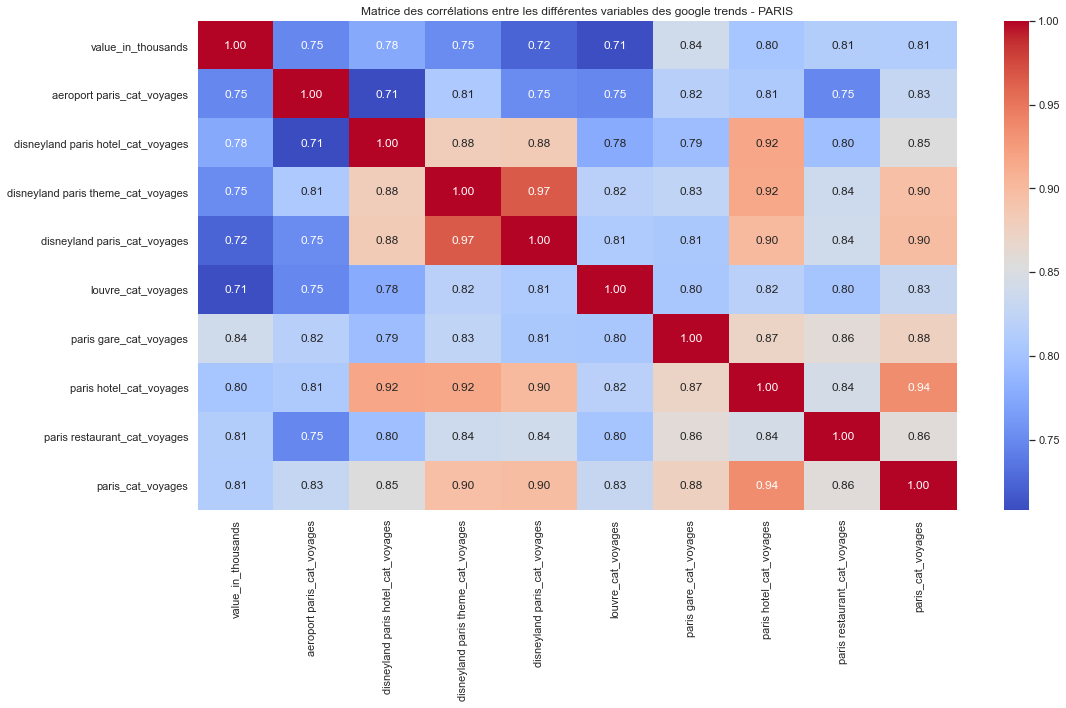

In [28]:
# je définis la taille de la matrice 
sns.set(rc = {'figure.figsize':(17,9)})
# Je veux deux chiffres après la virgule
sns.heatmap(df_paris.corr(), cmap='coolwarm', annot=True, fmt=".2f") 
plt.title("Matrice des corrélations entre les différentes variables des google trends - PARIS")

In [29]:
df_paris_viz=df_Official_Data_Paris.merge(df_gt6_paris, on="date", how="inner")

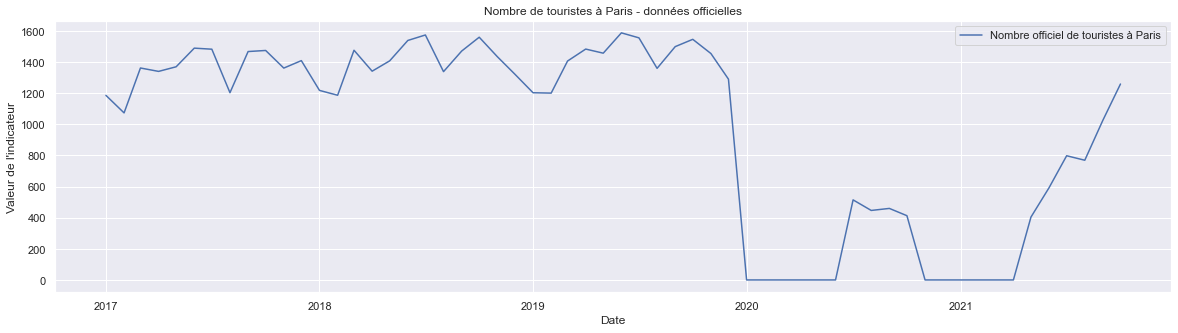

In [30]:
x=df_paris_viz[["date"]]
y=df_paris_viz[["value_in_thousands"]]
fig = plt.figure(1, figsize=(20, 5))
plt.plot(x, y, label="Nombre officiel de touristes à Paris")
plt.title('Nombre de touristes à Paris - données officielles')
plt.xlabel('Date')
plt.ylabel("Valeur de l'indicateur")
plt.legend()

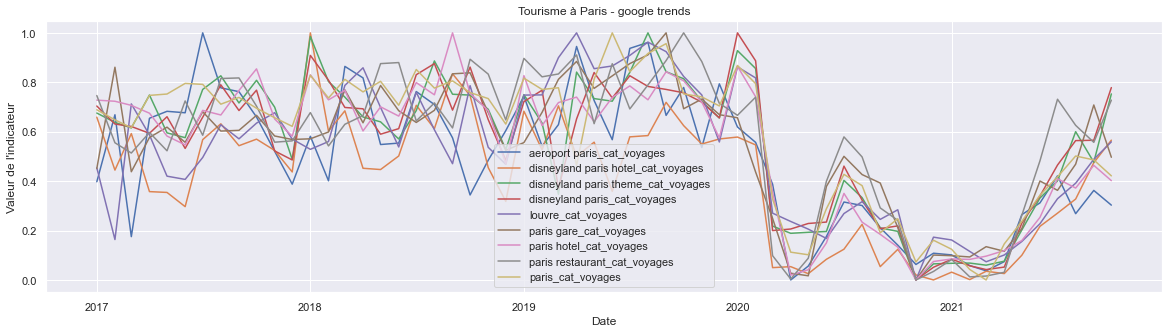

In [31]:
x2=df_paris_viz[["date"]]
y2=df_paris_viz[["aeroport paris_cat_voyages"]]
y3=df_paris_viz[["disneyland paris hotel_cat_voyages"]]
y4=df_paris_viz[["disneyland paris theme_cat_voyages"]]
y5=df_paris_viz[["disneyland paris_cat_voyages"]]
y6=df_paris_viz[["louvre_cat_voyages"]]
y7=df_paris_viz[["paris gare_cat_voyages"]]
y8=df_paris_viz[["paris hotel_cat_voyages"]]
y9=df_paris_viz[["paris restaurant_cat_voyages"]]
y10=df_paris_viz[["paris_cat_voyages"]]


fig2 = plt.figure(1, figsize=(20, 5))
plt.plot(x2, y2, label="aeroport paris_cat_voyages")
plt.plot(x2, y3, label="disneyland paris hotel_cat_voyages")
plt.plot(x2, y4, label="disneyland paris theme_cat_voyages")
plt.plot(x2, y5, label="disneyland paris_cat_voyages")
plt.plot(x2, y6, label="louvre_cat_voyages")
plt.plot(x2, y7, label="paris gare_cat_voyages")
plt.plot(x2, y8, label="paris hotel_cat_voyages")
plt.plot(x2, y9, label="paris restaurant_cat_voyages")
plt.plot(x2, y10, label="paris_cat_voyages")
plt.title('Tourisme à Paris - google trends')
plt.xlabel('Date')
plt.ylabel("Valeur de l'indicateur")
plt.legend()

# LYON - Rhône

## LASSO pour la sélection des google trends lyonnaises

In [32]:
# je définis mon vecteur cible y ( à prédire) et mes variables (X, les google trends) 
# et je les convertis en vecteur pour pouvoir appliquer le Lasso
y=df_lyon["value_in_thousands"].to_numpy()
X=df_lyon.drop(["value_in_thousands"], axis = 1).to_numpy()

# je sépare mon échantillon
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=12)

pipeline = Pipeline([
                     ('scaler',StandardScaler()),
                     ('model',Lasso())
])

# on veut optimiser notre hyperparamètre alpha
search = GridSearchCV(pipeline,
                      {'model__alpha':np.arange(0.1,10,0.1)},
                      cv = 5, scoring="neg_mean_squared_error",verbose=3
                      )

In [33]:
# entrainement 
search.fit(X_train,y_train)
search.best_params_
coefficients = search.best_estimator_.named_steps['model'].coef_
importance = np.abs(coefficients)
importance

Fitting 5 folds for each of 99 candidates, totalling 495 fits
[CV] model__alpha=0.1 ................................................
[CV] ............... model__alpha=0.1, score=-13662.160, total=   0.0s
[CV] model__alpha=0.1 ................................................
[CV] ............... model__alpha=0.1, score=-10492.075, total=   0.0s
[CV] model__alpha=0.1 ................................................
[CV] ................ model__alpha=0.1, score=-7090.352, total=   0.0s
[CV] model__alpha=0.1 ................................................
[CV] ................ model__alpha=0.1, score=-2889.642, total=   0.0s
[CV] model__alpha=0.1 ................................................
[CV] ................ model__alpha=0.1, score=-3607.576, total=   0.0s
[CV] model__alpha=0.2 ................................................
[CV] ............... model__alpha=0.2, score=-13659.438, total=   0.0s
[CV] model__alpha=0.2 ................................................
[CV] ..........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s



[CV] model__alpha=0.8 ................................................
[CV] ................ model__alpha=0.8, score=-2918.699, total=   0.0s
[CV] model__alpha=0.8 ................................................
[CV] ................ model__alpha=0.8, score=-3637.375, total=   0.0s
[CV] model__alpha=0.9 ................................................
[CV] ............... model__alpha=0.9, score=-13640.687, total=   0.0s
[CV] model__alpha=0.9 ................................................
[CV] ............... model__alpha=0.9, score=-10477.712, total=   0.0s
[CV] model__alpha=0.9 ................................................
[CV] ................ model__alpha=0.9, score=-6945.830, total=   0.0s
[CV] model__alpha=0.9 ................................................
[CV] ................ model__alpha=0.9, score=-2922.894, total=   0.0s
[CV] model__alpha=0.9 ................................................
[CV] ................ model__alpha=0.9, score=-3641.690, total=   0.0s
[CV] 

[CV]  model__alpha=2.3000000000000003, score=-13604.778, total=   0.0s
[CV] model__alpha=2.3000000000000003 .................................
[CV]  model__alpha=2.3000000000000003, score=-10455.688, total=   0.0s
[CV] model__alpha=2.3000000000000003 .................................
[CV] . model__alpha=2.3000000000000003, score=-6707.733, total=   0.0s
[CV] model__alpha=2.3000000000000003 .................................
[CV] . model__alpha=2.3000000000000003, score=-2982.741, total=   0.0s
[CV] model__alpha=2.3000000000000003 .................................
[CV] . model__alpha=2.3000000000000003, score=-3703.634, total=   0.0s
[CV] model__alpha=2.4000000000000004 .................................
[CV]  model__alpha=2.4000000000000004, score=-13602.295, total=   0.0s
[CV] model__alpha=2.4000000000000004 .................................
[CV]  model__alpha=2.4000000000000004, score=-10454.266, total=   0.0s
[CV] model__alpha=2.4000000000000004 .................................
[CV] .

[CV] model__alpha=3.8000000000000003 .................................
[CV]  model__alpha=3.8000000000000003, score=-10436.486, total=   0.0s
[CV] model__alpha=3.8000000000000003 .................................
[CV] . model__alpha=3.8000000000000003, score=-6473.556, total=   0.0s
[CV] model__alpha=3.8000000000000003 .................................
[CV] . model__alpha=3.8000000000000003, score=-3049.159, total=   0.0s
[CV] model__alpha=3.8000000000000003 .................................
[CV] . model__alpha=3.8000000000000003, score=-3773.173, total=   0.0s
[CV] model__alpha=3.9000000000000004 .................................
[CV]  model__alpha=3.9000000000000004, score=-13566.340, total=   0.0s
[CV] model__alpha=3.9000000000000004 .................................
[CV]  model__alpha=3.9000000000000004, score=-10435.367, total=   0.0s
[CV] model__alpha=3.9000000000000004 .................................
[CV] . model__alpha=3.9000000000000004, score=-6458.714, total=   0.0s
[CV] m

[CV] model__alpha=5.5 ................................................
[CV] ............... model__alpha=5.5, score=-13530.676, total=   0.0s
[CV] model__alpha=5.5 ................................................
[CV] ............... model__alpha=5.5, score=-10420.219, total=   0.0s
[CV] model__alpha=5.5 ................................................
[CV] ................ model__alpha=5.5, score=-6234.326, total=   0.0s
[CV] model__alpha=5.5 ................................................
[CV] ................ model__alpha=5.5, score=-3127.307, total=   0.0s
[CV] model__alpha=5.5 ................................................
[CV] ................ model__alpha=5.5, score=-3855.947, total=   0.0s
[CV] model__alpha=5.6 ................................................
[CV] ............... model__alpha=5.6, score=-13528.539, total=   0.0s
[CV] model__alpha=5.6 ................................................
[CV] ............... model__alpha=5.6, score=-10419.443, total=   0.0s
[CV] m

[CV] model__alpha=6.6 ................................................
[CV] ................ model__alpha=6.6, score=-3911.751, total=   0.0s
[CV] model__alpha=6.7 ................................................
[CV] ............... model__alpha=6.7, score=-13505.747, total=   0.0s
[CV] model__alpha=6.7 ................................................
[CV] ............... model__alpha=6.7, score=-10412.252, total=   0.0s
[CV] model__alpha=6.7 ................................................
[CV] ................ model__alpha=6.7, score=-6082.198, total=   0.0s
[CV] model__alpha=6.7 ................................................
[CV] ................ model__alpha=6.7, score=-3184.308, total=   0.0s
[CV] model__alpha=6.7 ................................................
[CV] ................ model__alpha=6.7, score=-3916.911, total=   0.0s
[CV] model__alpha=6.8 ................................................
[CV] ............... model__alpha=6.8, score=-13503.741, total=   0.0s
[CV] m

[CV] ............... model__alpha=8.0, score=-13480.502, total=   0.0s
[CV] model__alpha=8.0 ................................................
[CV] ............... model__alpha=8.0, score=-10406.904, total=   0.0s
[CV] model__alpha=8.0 ................................................
[CV] ................ model__alpha=8.0, score=-5933.028, total=   0.0s
[CV] model__alpha=8.0 ................................................
[CV] ................ model__alpha=8.0, score=-3247.776, total=   0.0s
[CV] model__alpha=8.0 ................................................
[CV] ................ model__alpha=8.0, score=-3985.324, total=   0.0s
[CV] model__alpha=8.1 ................................................
[CV] ............... model__alpha=8.1, score=-13478.636, total=   0.0s
[CV] model__alpha=8.1 ................................................
[CV] ............... model__alpha=8.1, score=-10406.634, total=   0.0s
[CV] model__alpha=8.1 ................................................
[CV] .

[CV] .. model__alpha=9.700000000000001, score=-3333.466, total=   0.0s
[CV] model__alpha=9.700000000000001 ..................................
[CV] .. model__alpha=9.700000000000001, score=-4078.585, total=   0.0s
[CV] model__alpha=9.8 ................................................
[CV] ............... model__alpha=9.8, score=-13448.570, total=   0.0s
[CV] model__alpha=9.8 ................................................
[CV] ............... model__alpha=9.8, score=-10405.137, total=   0.0s
[CV] model__alpha=9.8 ................................................
[CV] ................ model__alpha=9.8, score=-5753.683, total=   0.0s
[CV] model__alpha=9.8 ................................................
[CV] ................ model__alpha=9.8, score=-3338.602, total=   0.0s
[CV] model__alpha=9.8 ................................................
[CV] ................ model__alpha=9.8, score=-4084.197, total=   0.0s
[CV] model__alpha=9.9 ................................................
[CV] .

[Parallel(n_jobs=1)]: Done 495 out of 495 | elapsed:    2.6s finished


array([81.50851472, 18.02313884])

In [34]:
# test 
search.fit(X_test,y_test)
search.best_params_
coefficients = search.best_estimator_.named_steps['model'].coef_
importance = np.abs(coefficients)
importance

Fitting 5 folds for each of 99 candidates, totalling 495 fits
[CV] model__alpha=0.1 ................................................
[CV] ................ model__alpha=0.1, score=-2211.213, total=   0.0s
[CV] model__alpha=0.1 ................................................
[CV] ................ model__alpha=0.1, score=-1066.095, total=   0.0s
[CV] model__alpha=0.1 ................................................
[CV] ................ model__alpha=0.1, score=-3600.638, total=   0.0s
[CV] model__alpha=0.1 ................................................
[CV] ................ model__alpha=0.1, score=-6484.856, total=   0.0s
[CV] model__alpha=0.1 ................................................
[CV] ................ model__alpha=0.1, score=-1919.211, total=   0.0s
[CV] model__alpha=0.2 ................................................
[CV] ................ model__alpha=0.2, score=-2207.100, total=   0.0s
[CV] model__alpha=0.2 ................................................
[CV] ..........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ................ model__alpha=0.2, score=-1912.196, total=   0.0s
[CV] model__alpha=0.30000000000000004 ................................
[CV]  model__alpha=0.30000000000000004, score=-2202.992, total=   0.0s
[CV] model__alpha=0.30000000000000004 ................................
[CV]  model__alpha=0.30000000000000004, score=-1065.352, total=   0.0s
[CV] model__alpha=0.30000000000000004 ................................
[CV]  model__alpha=0.30000000000000004, score=-3586.474, total=   0.0s
[CV] model__alpha=0.30000000000000004 ................................
[CV]  model__alpha=0.30000000000000004, score=-6538.003, total=   0.0s
[CV] model__alpha=0.30000000000000004 ................................
[CV]  model__alpha=0.30000000000000004, score=-1905.240, total=   0.0s
[CV] model__alpha=0.4 ................................................
[CV] ................ model__alpha=0.4, score=-2198.891, total=   0.0s
[CV] model__alpha=0.4 ................................................
[CV] .

[CV] ................ model__alpha=1.6, score=-1062.655, total=   0.0s
[CV] model__alpha=1.6 ................................................
[CV] ................ model__alpha=1.6, score=-3495.683, total=   0.0s
[CV] model__alpha=1.6 ................................................
[CV] ................ model__alpha=1.6, score=-6888.801, total=   0.0s
[CV] model__alpha=1.6 ................................................
[CV] ................ model__alpha=1.6, score=-1820.255, total=   0.0s
[CV] model__alpha=1.7000000000000002 .................................
[CV] . model__alpha=1.7000000000000002, score=-2146.107, total=   0.0s
[CV] model__alpha=1.7000000000000002 .................................
[CV] . model__alpha=1.7000000000000002, score=-1062.600, total=   0.0s
[CV] model__alpha=1.7000000000000002 .................................
[CV] . model__alpha=1.7000000000000002, score=-3488.790, total=   0.0s
[CV] model__alpha=1.7000000000000002 .................................
[CV] .

[CV] ................ model__alpha=2.7, score=-1756.234, total=   0.0s
[CV] model__alpha=2.8000000000000003 .................................
[CV] . model__alpha=2.8000000000000003, score=-2102.222, total=   0.0s
[CV] model__alpha=2.8000000000000003 .................................
[CV] . model__alpha=2.8000000000000003, score=-1063.443, total=   0.0s
[CV] model__alpha=2.8000000000000003 .................................
[CV] . model__alpha=2.8000000000000003, score=-3413.827, total=   0.0s
[CV] model__alpha=2.8000000000000003 .................................
[CV] . model__alpha=2.8000000000000003, score=-7220.828, total=   0.0s
[CV] model__alpha=2.8000000000000003 .................................
[CV] . model__alpha=2.8000000000000003, score=-1750.773, total=   0.0s
[CV] model__alpha=2.9000000000000004 .................................
[CV] . model__alpha=2.9000000000000004, score=-2098.267, total=   0.0s
[CV] model__alpha=2.9000000000000004 .................................
[CV] .

[CV] ................ model__alpha=4.3, score=-2043.526, total=   0.0s
[CV] model__alpha=4.3 ................................................
[CV] ................ model__alpha=4.3, score=-1068.852, total=   0.0s
[CV] model__alpha=4.3 ................................................
[CV] ................ model__alpha=4.3, score=-3314.142, total=   0.0s
[CV] model__alpha=4.3 ................................................
[CV] ................ model__alpha=4.3, score=-7646.950, total=   0.0s
[CV] model__alpha=4.3 ................................................
[CV] ................ model__alpha=4.3, score=-1676.023, total=   0.0s
[CV] model__alpha=4.3999999999999995 .................................
[CV] . model__alpha=4.3999999999999995, score=-2039.660, total=   0.0s
[CV] model__alpha=4.3999999999999995 .................................
[CV] . model__alpha=4.3999999999999995, score=-1069.387, total=   0.0s
[CV] model__alpha=4.3999999999999995 .................................
[CV] .

[CV] ................ model__alpha=5.5, score=-1625.907, total=   0.0s
[CV] model__alpha=5.6 ................................................
[CV] ................ model__alpha=5.6, score=-1993.728, total=   0.0s
[CV] model__alpha=5.6 ................................................
[CV] ................ model__alpha=5.6, score=-1077.516, total=   0.0s
[CV] model__alpha=5.6 ................................................
[CV] ................ model__alpha=5.6, score=-3230.117, total=   0.0s
[CV] model__alpha=5.6 ................................................
[CV] ................ model__alpha=5.6, score=-8026.221, total=   0.0s
[CV] model__alpha=5.6 ................................................
[CV] ................ model__alpha=5.6, score=-1622.119, total=   0.0s
[CV] model__alpha=5.7 ................................................
[CV] ................ model__alpha=5.7, score=-1989.939, total=   0.0s
[CV] model__alpha=5.7 ................................................
[CV] .

[CV] ................ model__alpha=6.8, score=-1088.791, total=   0.0s
[CV] model__alpha=6.8 ................................................
[CV] ................ model__alpha=6.8, score=-3154.507, total=   0.0s
[CV] model__alpha=6.8 ................................................
[CV] ................ model__alpha=6.8, score=-8384.530, total=   0.0s
[CV] model__alpha=6.8 ................................................
[CV] ................ model__alpha=6.8, score=-1581.327, total=   0.0s
[CV] model__alpha=6.9 ................................................
[CV] ................ model__alpha=6.9, score=-1944.926, total=   0.0s
[CV] model__alpha=6.9 ................................................
[CV] ................ model__alpha=6.9, score=-1089.873, total=   0.0s
[CV] model__alpha=6.9 ................................................
[CV] ................ model__alpha=6.9, score=-3148.290, total=   0.0s
[CV] model__alpha=6.9 ................................................
[CV] .

[CV] ................ model__alpha=8.2, score=-1105.923, total=   0.0s
[CV] model__alpha=8.2 ................................................
[CV] ................ model__alpha=8.2, score=-3068.663, total=   0.0s
[CV] model__alpha=8.2 ................................................
[CV] ................ model__alpha=8.2, score=-8812.523, total=   0.0s
[CV] model__alpha=8.2 ................................................
[CV] ................ model__alpha=8.2, score=-1544.614, total=   0.0s
[CV] model__alpha=8.3 ................................................
[CV] ................ model__alpha=8.3, score=-1893.482, total=   0.0s
[CV] model__alpha=8.3 ................................................
[CV] ................ model__alpha=8.3, score=-1107.310, total=   0.0s
[CV] model__alpha=8.3 ................................................
[CV] ................ model__alpha=8.3, score=-3062.629, total=   0.0s
[CV] model__alpha=8.3 ................................................
[CV] .

[CV] model__alpha=9.4 ................................................
[CV] ................ model__alpha=9.4, score=-2997.113, total=   0.0s
[CV] model__alpha=9.4 ................................................
[CV] ................ model__alpha=9.4, score=-9187.916, total=   0.0s
[CV] model__alpha=9.4 ................................................
[CV] ................ model__alpha=9.4, score=-1522.470, total=   0.0s
[CV] model__alpha=9.5 ................................................
[CV] ................ model__alpha=9.5, score=-1850.306, total=   0.0s
[CV] model__alpha=9.5 ................................................
[CV] ................ model__alpha=9.5, score=-1125.665, total=   0.0s
[CV] model__alpha=9.5 ................................................
[CV] ................ model__alpha=9.5, score=-2991.235, total=   0.0s
[CV] model__alpha=9.5 ................................................
[CV] ................ model__alpha=9.5, score=-9219.555, total=   0.0s
[CV] m

[Parallel(n_jobs=1)]: Done 495 out of 495 | elapsed:    3.2s finished


array([54.67902432, 65.5699964 ])

Conclusion: les deux google trends sont pertinents pour étudier le nombre de touristes dans le Rhône.
Cependant, la variable "lyon hotel_cat_voyages" est plus pertinente que "lyon gare_cat_voyages".

## RL Lyon

In [35]:
X = sm.add_constant(df_lyon.drop(["value_in_thousands"], axis = 1))
results = sm.OLS(df_lyon["value_in_thousands"], X).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:     value_in_thousands   R-squared:                       0.709
Model:                            OLS   Adj. R-squared:                  0.699
Method:                 Least Squares   F-statistic:                     67.12
Date:                Thu, 07 Apr 2022   Prob (F-statistic):           1.75e-15
Time:                        11:39:10   Log-Likelihood:                -327.87
No. Observations:                  58   AIC:                             661.7
Df Residuals:                      55   BIC:                             667.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                    -29

## Matrice des corrélations - Lyon

Text(0.5, 1.0, 'Matrice des corrélations entre les différentes variables des google trends - LYON')

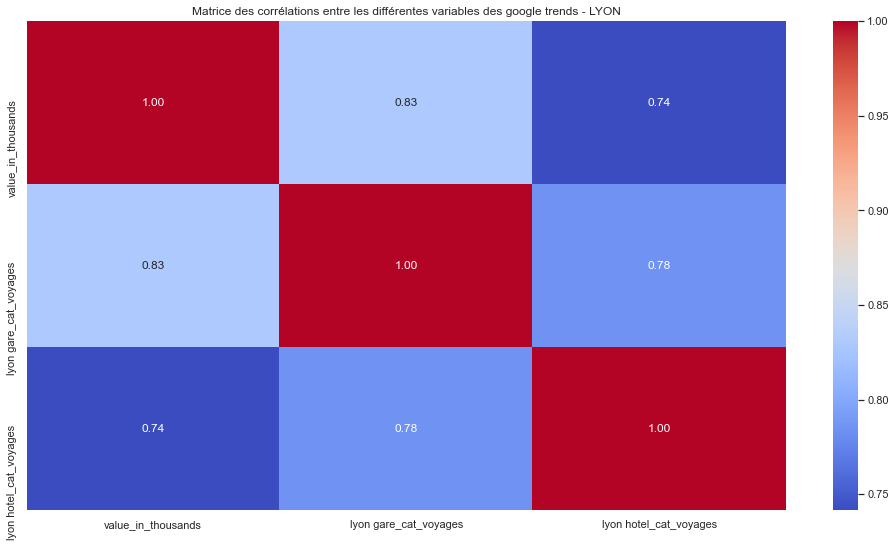

In [36]:
# je définis la taille de la matrice 
sns.set(rc = {'figure.figsize':(17,9)})
# Je veux deux chiffres après la virgule
sns.heatmap(df_lyon.corr(), cmap='coolwarm', annot=True, fmt=".2f") 
plt.title("Matrice des corrélations entre les différentes variables des google trends - LYON")

# MARSEILLE - Bouches-du-Rhône

## LASSO

In [37]:
# je définis mon vecteur cible y ( à prédire) et mes variables (X, les google trends) 
# et je les convertis en vecteur pour pouvoir appliquer le Lasso
y=df_marseille["value_in_thousands"].to_numpy()
X=df_marseille.drop(["value_in_thousands"], axis = 1).to_numpy()

# je sépare mon échantillon
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=12)

pipeline = Pipeline([
                     ('scaler',StandardScaler()),
                     ('model',Lasso())
])

# on veut optimiser notre hyperparamètre alpha
search = GridSearchCV(pipeline,
                      {'model__alpha':np.arange(0.1,10,0.1)},
                      cv = 5, scoring="neg_mean_squared_error",verbose=3
                      )

In [38]:
# entrainement 
search.fit(X_train,y_train)
search.best_params_
coefficients = search.best_estimator_.named_steps['model'].coef_
importance = np.abs(coefficients)
importance

Fitting 5 folds for each of 99 candidates, totalling 495 fits
[CV] model__alpha=0.1 ................................................
[CV] ............... model__alpha=0.1, score=-15542.101, total=   0.0s
[CV] model__alpha=0.1 ................................................
[CV] ............... model__alpha=0.1, score=-10618.128, total=   0.0s
[CV] model__alpha=0.1 ................................................
[CV] ................ model__alpha=0.1, score=-2988.704, total=   0.0s
[CV] model__alpha=0.1 ................................................
[CV] ................ model__alpha=0.1, score=-8961.501, total=   0.0s
[CV] model__alpha=0.1 ................................................
[CV] ................ model__alpha=0.1, score=-3188.478, total=   0.0s
[CV] model__alpha=0.2 ................................................
[CV] ............... model__alpha=0.2, score=-15493.642, total=   0.0s
[CV] model__alpha=0.2 ................................................
[CV] ..........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ............... model__alpha=0.9, score=-10950.740, total=   0.0s
[CV] model__alpha=0.9 ................................................
[CV] ................ model__alpha=0.9, score=-3118.328, total=   0.0s
[CV] model__alpha=0.9 ................................................
[CV] ................ model__alpha=0.9, score=-9067.810, total=   0.0s
[CV] model__alpha=0.9 ................................................
[CV] ................ model__alpha=0.9, score=-3080.181, total=   0.0s
[CV] model__alpha=1.0 ................................................
[CV] ............... model__alpha=1.0, score=-15134.433, total=   0.0s
[CV] model__alpha=1.0 ................................................
[CV] ............... model__alpha=1.0, score=-10939.659, total=   0.0s
[CV] model__alpha=1.0 ................................................
[CV] ................ model__alpha=1.0, score=-3138.076, total=   0.0s
[CV] model__alpha=1.0 ................................................
[CV] .

[CV] ............... model__alpha=2.2, score=-10817.398, total=   0.0s
[CV] model__alpha=2.2 ................................................
[CV] ................ model__alpha=2.2, score=-3362.709, total=   0.0s
[CV] model__alpha=2.2 ................................................
[CV] ................ model__alpha=2.2, score=-9225.331, total=   0.0s
[CV] model__alpha=2.2 ................................................
[CV] ................ model__alpha=2.2, score=-2978.410, total=   0.0s
[CV] model__alpha=2.3000000000000003 .................................
[CV]  model__alpha=2.3000000000000003, score=-14658.656, total=   0.0s
[CV] model__alpha=2.3000000000000003 .................................
[CV]  model__alpha=2.3000000000000003, score=-10808.122, total=   0.0s
[CV] model__alpha=2.3000000000000003 .................................
[CV] . model__alpha=2.3000000000000003, score=-3362.706, total=   0.0s
[CV] model__alpha=2.3000000000000003 .................................
[CV] .

[CV]  model__alpha=3.8000000000000003, score=-10685.640, total=   0.0s
[CV] model__alpha=3.8000000000000003 .................................
[CV] . model__alpha=3.8000000000000003, score=-3376.806, total=   0.0s
[CV] model__alpha=3.8000000000000003 .................................
[CV] . model__alpha=3.8000000000000003, score=-9219.046, total=   0.0s
[CV] model__alpha=3.8000000000000003 .................................
[CV] . model__alpha=3.8000000000000003, score=-2979.470, total=   0.0s
[CV] model__alpha=3.9000000000000004 .................................
[CV]  model__alpha=3.9000000000000004, score=-14340.968, total=   0.0s
[CV] model__alpha=3.9000000000000004 .................................
[CV]  model__alpha=3.9000000000000004, score=-10678.585, total=   0.0s
[CV] model__alpha=3.9000000000000004 .................................
[CV] . model__alpha=3.9000000000000004, score=-3378.743, total=   0.0s
[CV] model__alpha=3.9000000000000004 .................................
[CV] .

[CV] ................ model__alpha=5.2, score=-9222.840, total=   0.0s
[CV] model__alpha=5.2 ................................................
[CV] ................ model__alpha=5.2, score=-2996.771, total=   0.0s
[CV] model__alpha=5.3 ................................................
[CV] ............... model__alpha=5.3, score=-14247.254, total=   0.0s
[CV] model__alpha=5.3 ................................................
[CV] ............... model__alpha=5.3, score=-10594.317, total=   0.0s
[CV] model__alpha=5.3 ................................................
[CV] ................ model__alpha=5.3, score=-3418.894, total=   0.0s
[CV] model__alpha=5.3 ................................................
[CV] ................ model__alpha=5.3, score=-9223.458, total=   0.0s
[CV] model__alpha=5.3 ................................................
[CV] ................ model__alpha=5.3, score=-2998.161, total=   0.0s
[CV] model__alpha=5.4 ................................................
[CV] .

[CV] ................ model__alpha=6.4, score=-9233.514, total=   0.0s
[CV] model__alpha=6.4 ................................................
[CV] ................ model__alpha=6.4, score=-3014.820, total=   0.0s
[CV] model__alpha=6.5 ................................................
[CV] ............... model__alpha=6.5, score=-14168.513, total=   0.0s
[CV] model__alpha=6.5 ................................................
[CV] ............... model__alpha=6.5, score=-10543.806, total=   0.0s
[CV] model__alpha=6.5 ................................................
[CV] ................ model__alpha=6.5, score=-3472.687, total=   0.0s
[CV] model__alpha=6.5 ................................................
[CV] ................ model__alpha=6.5, score=-9234.683, total=   0.0s
[CV] model__alpha=6.5 ................................................
[CV] ................ model__alpha=6.5, score=-3016.458, total=   0.0s
[CV] model__alpha=6.6 ................................................
[CV] .

[CV] ............... model__alpha=7.9, score=-10510.143, total=   0.0s
[CV] model__alpha=7.9 ................................................
[CV] ................ model__alpha=7.9, score=-3553.871, total=   0.0s
[CV] model__alpha=7.9 ................................................
[CV] ................ model__alpha=7.9, score=-9098.621, total=   0.0s
[CV] model__alpha=7.9 ................................................
[CV] ................ model__alpha=7.9, score=-3041.563, total=   0.0s
[CV] model__alpha=8.0 ................................................
[CV] ............... model__alpha=8.0, score=-14072.164, total=   0.0s
[CV] model__alpha=8.0 ................................................
[CV] ............... model__alpha=8.0, score=-10508.780, total=   0.0s
[CV] model__alpha=8.0 ................................................
[CV] ................ model__alpha=8.0, score=-3558.668, total=   0.0s
[CV] model__alpha=8.0 ................................................
[CV] .

[CV] ................ model__alpha=9.3, score=-3627.494, total=   0.0s
[CV] model__alpha=9.3 ................................................
[CV] ................ model__alpha=9.3, score=-8957.453, total=   0.0s
[CV] model__alpha=9.3 ................................................
[CV] ................ model__alpha=9.3, score=-3070.713, total=   0.0s
[CV] model__alpha=9.4 ................................................
[CV] ............... model__alpha=9.4, score=-13984.319, total=   0.0s
[CV] model__alpha=9.4 ................................................
[CV] ............... model__alpha=9.4, score=-10504.273, total=   0.0s
[CV] model__alpha=9.4 ................................................
[CV] ................ model__alpha=9.4, score=-3633.287, total=   0.0s
[CV] model__alpha=9.4 ................................................
[CV] ................ model__alpha=9.4, score=-8947.511, total=   0.0s
[CV] model__alpha=9.4 ................................................
[CV] .

[Parallel(n_jobs=1)]: Done 495 out of 495 | elapsed:    2.6s finished


array([15.98677715,  0.        , 19.16960359, 33.74160608, 22.15839496,
        0.61778494, 35.7201379 ])

In [39]:
# test 
search.fit(X_test,y_test)
search.best_params_
coefficients = search.best_estimator_.named_steps['model'].coef_
importance = np.abs(coefficients)
importance

Fitting 5 folds for each of 99 candidates, totalling 495 fits
[CV] model__alpha=0.1 ................................................
[CV] ................ model__alpha=0.1, score=-8059.786, total=   0.0s
[CV] model__alpha=0.1 ................................................
[CV] ................. model__alpha=0.1, score=-917.062, total=   0.0s
[CV] model__alpha=0.1 ................................................
[CV] ............... model__alpha=0.1, score=-13488.104, total=   0.0s
[CV] model__alpha=0.1 ................................................
[CV] ................ model__alpha=0.1, score=-6265.053, total=   0.0s
[CV] model__alpha=0.1 ................................................
[CV] ............... model__alpha=0.1, score=-21085.924, total=   0.0s
[CV] model__alpha=0.2 ................................................
[CV] ................ model__alpha=0.2, score=-7796.227, total=   0.0s
[CV] model__alpha=0.2 ................................................
[CV] ..........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ................ model__alpha=0.4, score=-7365.811, total=   0.0s
[CV] model__alpha=0.4 ................................................
[CV] ................ model__alpha=0.4, score=-1045.798, total=   0.0s
[CV] model__alpha=0.4 ................................................
[CV] ............... model__alpha=0.4, score=-10906.770, total=   0.0s
[CV] model__alpha=0.4 ................................................
[CV] ................ model__alpha=0.4, score=-6181.013, total=   0.0s
[CV] model__alpha=0.4 ................................................
[CV] ............... model__alpha=0.4, score=-20692.412, total=   0.0s
[CV] model__alpha=0.5 ................................................
[CV] ................ model__alpha=0.5, score=-7201.363, total=   0.0s
[CV] model__alpha=0.5 ................................................
[CV] ................ model__alpha=0.5, score=-1086.733, total=   0.0s
[CV] model__alpha=0.5 ................................................
[CV] .

[CV]  model__alpha=1.5000000000000002, score=-20455.374, total=   0.0s
[CV] model__alpha=1.6 ................................................
[CV] ................ model__alpha=1.6, score=-6667.203, total=   0.0s
[CV] model__alpha=1.6 ................................................
[CV] ................ model__alpha=1.6, score=-1219.360, total=   0.0s
[CV] model__alpha=1.6 ................................................
[CV] ................ model__alpha=1.6, score=-7225.155, total=   0.0s
[CV] model__alpha=1.6 ................................................
[CV] ................ model__alpha=1.6, score=-5758.224, total=   0.0s
[CV] model__alpha=1.6 ................................................
[CV] ............... model__alpha=1.6, score=-20438.038, total=   0.0s
[CV] model__alpha=1.7000000000000002 .................................
[CV] . model__alpha=1.7000000000000002, score=-6654.273, total=   0.0s
[CV] model__alpha=1.7000000000000002 .................................
[CV] .

[CV] model__alpha=2.8000000000000003 .................................
[CV]  model__alpha=2.8000000000000003, score=-20241.873, total=   0.0s
[CV] model__alpha=2.9000000000000004 .................................
[CV] . model__alpha=2.9000000000000004, score=-6503.292, total=   0.0s
[CV] model__alpha=2.9000000000000004 .................................
[CV] . model__alpha=2.9000000000000004, score=-1251.404, total=   0.0s
[CV] model__alpha=2.9000000000000004 .................................
[CV] . model__alpha=2.9000000000000004, score=-6832.504, total=   0.0s
[CV] model__alpha=2.9000000000000004 .................................
[CV] . model__alpha=2.9000000000000004, score=-6169.132, total=   0.0s
[CV] model__alpha=2.9000000000000004 .................................
[CV]  model__alpha=2.9000000000000004, score=-20226.008, total=   0.0s
[CV] model__alpha=3.0000000000000004 .................................
[CV] . model__alpha=3.0000000000000004, score=-6491.005, total=   0.0s
[CV] m

[CV] ................ model__alpha=4.1, score=-6489.949, total=   0.0s
[CV] model__alpha=4.1 ................................................
[CV] ................ model__alpha=4.1, score=-6562.685, total=   0.0s
[CV] model__alpha=4.1 ................................................
[CV] ............... model__alpha=4.1, score=-20040.956, total=   0.0s
[CV] model__alpha=4.2 ................................................
[CV] ................ model__alpha=4.2, score=-6347.542, total=   0.0s
[CV] model__alpha=4.2 ................................................
[CV] ................ model__alpha=4.2, score=-1284.256, total=   0.0s
[CV] model__alpha=4.2 ................................................
[CV] ................ model__alpha=4.2, score=-6461.626, total=   0.0s
[CV] model__alpha=4.2 ................................................
[CV] ................ model__alpha=4.2, score=-6596.027, total=   0.0s
[CV] model__alpha=4.2 ................................................
[CV] .

[CV] ................ model__alpha=5.3, score=-1308.923, total=   0.0s
[CV] model__alpha=5.3 ................................................
[CV] ................ model__alpha=5.3, score=-6160.811, total=   0.0s
[CV] model__alpha=5.3 ................................................
[CV] ................ model__alpha=5.3, score=-6969.472, total=   0.0s
[CV] model__alpha=5.3 ................................................
[CV] ............... model__alpha=5.3, score=-19866.236, total=   0.0s
[CV] model__alpha=5.4 ................................................
[CV] ................ model__alpha=5.4, score=-6210.675, total=   0.0s
[CV] model__alpha=5.4 ................................................
[CV] ................ model__alpha=5.4, score=-1311.060, total=   0.0s
[CV] model__alpha=5.4 ................................................
[CV] ................ model__alpha=5.4, score=-6134.032, total=   0.0s
[CV] model__alpha=5.4 ................................................
[CV] .

[CV] ............... model__alpha=6.4, score=-19715.246, total=   0.0s
[CV] model__alpha=6.5 ................................................
[CV] ................ model__alpha=6.5, score=-6091.241, total=   0.0s
[CV] model__alpha=6.5 ................................................
[CV] ................ model__alpha=6.5, score=-1335.088, total=   0.0s
[CV] model__alpha=6.5 ................................................
[CV] ................ model__alpha=6.5, score=-5845.569, total=   0.0s
[CV] model__alpha=6.5 ................................................
[CV] ................ model__alpha=6.5, score=-7389.734, total=   0.0s
[CV] model__alpha=6.5 ................................................
[CV] ............... model__alpha=6.5, score=-19701.953, total=   0.0s
[CV] model__alpha=6.6 ................................................
[CV] ................ model__alpha=6.6, score=-6080.669, total=   0.0s
[CV] model__alpha=6.6 ................................................
[CV] .

[CV] ............... model__alpha=7.7, score=-19548.701, total=   0.0s
[CV] model__alpha=7.8 ................................................
[CV] ................ model__alpha=7.8, score=-5957.519, total=   0.0s
[CV] model__alpha=7.8 ................................................
[CV] ................ model__alpha=7.8, score=-1364.802, total=   0.0s
[CV] model__alpha=7.8 ................................................
[CV] ................ model__alpha=7.8, score=-5519.897, total=   0.0s
[CV] model__alpha=7.8 ................................................
[CV] ................ model__alpha=7.8, score=-7859.991, total=   0.0s
[CV] model__alpha=7.8 ................................................
[CV] ............... model__alpha=7.8, score=-19536.345, total=   0.0s
[CV] model__alpha=7.9 ................................................
[CV] ................ model__alpha=7.9, score=-5947.566, total=   0.0s
[CV] model__alpha=7.9 ................................................
[CV] .

[CV] ............... model__alpha=9.0, score=-19394.287, total=   0.0s
[CV] model__alpha=9.1 ................................................
[CV] ................ model__alpha=9.1, score=-5831.682, total=   0.0s
[CV] model__alpha=9.1 ................................................
[CV] ................ model__alpha=9.1, score=-1403.692, total=   0.0s
[CV] model__alpha=9.1 ................................................
[CV] ................ model__alpha=9.1, score=-5210.487, total=   0.0s
[CV] model__alpha=9.1 ................................................
[CV] ................ model__alpha=9.1, score=-8345.753, total=   0.0s
[CV] model__alpha=9.1 ................................................
[CV] ............... model__alpha=9.1, score=-19382.872, total=   0.0s
[CV] model__alpha=9.2 ................................................
[CV] ................ model__alpha=9.2, score=-5822.472, total=   0.0s
[CV] model__alpha=9.2 ................................................
[CV] .

[Parallel(n_jobs=1)]: Done 495 out of 495 | elapsed:    3.0s finished


array([59.06979858,  0.        ,  0.        ,  0.        ,  6.57146409,
       26.03420581, 56.7112544 ])

Bilan: 4 des 7 google trends sont utiles pour étudier le nb de touristes dans les Bouches du Rhône:
- 1: marseille gare_cat_voyages
- 2: marseille_cat_voyages
- 3: marseille_station_cat_voyages
- 4: marseille vieux port_cat_voyages

marseille restaurant_cat_voyages, mucem theme et marseille hotel_cat_voyages ne sont pas utiles.

## RL Marseille

In [40]:
X = sm.add_constant(df_marseille.drop(["value_in_thousands"], axis = 1))
results = sm.OLS(df_marseille["value_in_thousands"], X).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:     value_in_thousands   R-squared:                       0.742
Model:                            OLS   Adj. R-squared:                  0.706
Method:                 Least Squares   F-statistic:                     20.51
Date:                Thu, 07 Apr 2022   Prob (F-statistic):           1.09e-12
Time:                        11:39:16   Log-Likelihood:                -331.62
No. Observations:                  58   AIC:                             679.2
Df Residuals:                      50   BIC:                             695.7
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

## Matrice des corrélations - Marseille

Text(0.5, 1.0, 'Matrice des corrélations entre les différentes variables des google trends - MARSEILLE')

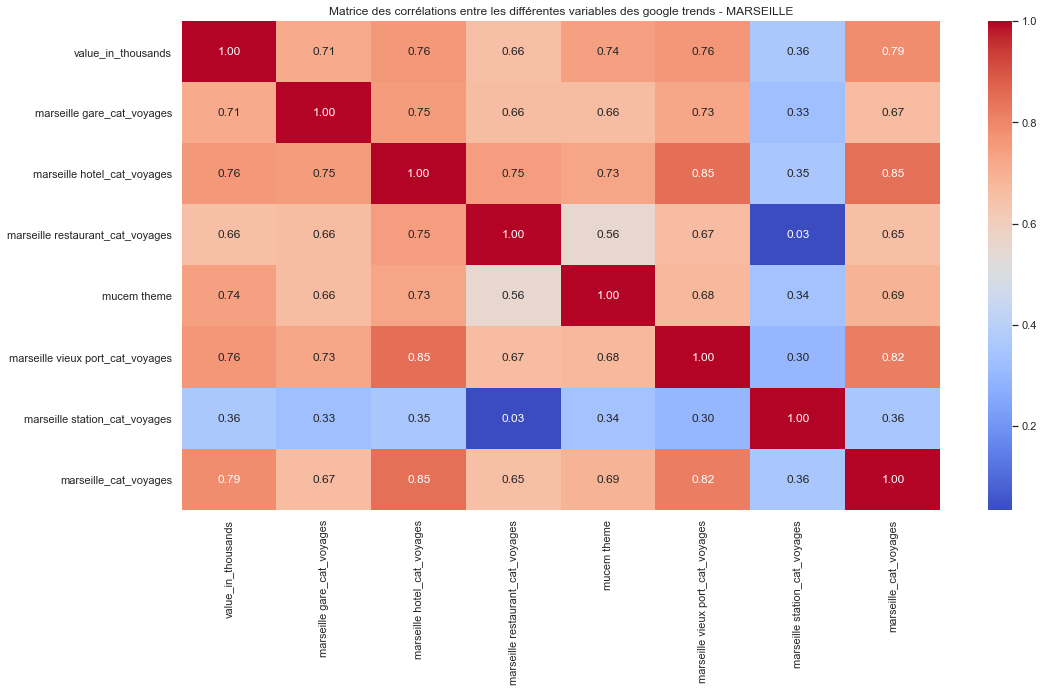

In [41]:
# je définis la taille de la matrice 
sns.set(rc = {'figure.figsize':(17,9)})
# Je veux deux chiffres après la virgule
sns.heatmap(df_marseille.corr(), cmap='coolwarm', annot=True, fmt=".2f") 
plt.title("Matrice des corrélations entre les différentes variables des google trends - MARSEILLE")

# NICE - Alpes Martimes, côte d'azur

In [42]:
# je définis mon vecteur cible y ( à prédire) et mes variables (X, les google trends) 
# et je les convertis en vecteur pour pouvoir appliquer le Lasso
y=df_nice["value_in_thousands"].to_numpy()
X=df_nice.drop(["value_in_thousands"], axis = 1).to_numpy()

# je sépare mon échantillon
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=12)

pipeline = Pipeline([
                     ('scaler',StandardScaler()),
                     ('model',Lasso())
])

# on veut optimiser notre hyperparamètre alpha
search = GridSearchCV(pipeline,
                      {'model__alpha':np.arange(0.1,10,0.1)},
                      cv = 5, scoring="neg_mean_squared_error",verbose=3
                      )

In [43]:
# entrainement 
search.fit(X_train,y_train)
search.best_params_
coefficients = search.best_estimator_.named_steps['model'].coef_
importance = np.abs(coefficients)
importance

Fitting 5 folds for each of 99 candidates, totalling 495 fits
[CV] model__alpha=0.1 ................................................
[CV] ............... model__alpha=0.1, score=-17896.873, total=   0.0s
[CV] model__alpha=0.1 ................................................
[CV] ............... model__alpha=0.1, score=-14350.934, total=   0.0s
[CV] model__alpha=0.1 ................................................
[CV] ................ model__alpha=0.1, score=-5171.133, total=   0.0s
[CV] model__alpha=0.1 ................................................
[CV] ................ model__alpha=0.1, score=-6553.966, total=   0.0s
[CV] model__alpha=0.1 ................................................
[CV] ................ model__alpha=0.1, score=-8366.265, total=   0.0s
[CV] model__alpha=0.2 ................................................
[CV] ............... model__alpha=0.2, score=-17782.083, total=   0.0s
[CV] model__alpha=0.2 ................................................
[CV] ..........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] . model__alpha=0.7000000000000001, score=-6523.915, total=   0.0s
[CV] model__alpha=0.7000000000000001 .................................
[CV] . model__alpha=0.7000000000000001, score=-7952.419, total=   0.0s
[CV] model__alpha=0.8 ................................................
[CV] ............... model__alpha=0.8, score=-17152.733, total=   0.0s
[CV] model__alpha=0.8 ................................................
[CV] ............... model__alpha=0.8, score=-14183.540, total=   0.0s
[CV] model__alpha=0.8 ................................................
[CV] ................ model__alpha=0.8, score=-4431.135, total=   0.0s
[CV] model__alpha=0.8 ................................................
[CV] ................ model__alpha=0.8, score=-6532.794, total=   0.0s
[CV] model__alpha=0.8 ................................................
[CV] ................ model__alpha=0.8, score=-7886.444, total=   0.0s
[CV] model__alpha=0.9 ................................................
[CV] .

[CV] ................ model__alpha=2.1, score=-3798.798, total=   0.0s
[CV] model__alpha=2.1 ................................................
[CV] ................ model__alpha=2.1, score=-6289.970, total=   0.0s
[CV] model__alpha=2.1 ................................................
[CV] ................ model__alpha=2.1, score=-7106.952, total=   0.0s
[CV] model__alpha=2.2 ................................................
[CV] ............... model__alpha=2.2, score=-16103.932, total=   0.0s
[CV] model__alpha=2.2 ................................................
[CV] ............... model__alpha=2.2, score=-14054.556, total=   0.0s
[CV] model__alpha=2.2 ................................................
[CV] ................ model__alpha=2.2, score=-3771.873, total=   0.0s
[CV] model__alpha=2.2 ................................................
[CV] ................ model__alpha=2.2, score=-6269.952, total=   0.0s
[CV] model__alpha=2.2 ................................................
[CV] .

[CV] . model__alpha=3.3000000000000003, score=-3539.037, total=   0.0s
[CV] model__alpha=3.3000000000000003 .................................
[CV] . model__alpha=3.3000000000000003, score=-6056.829, total=   0.0s
[CV] model__alpha=3.3000000000000003 .................................
[CV] . model__alpha=3.3000000000000003, score=-6506.159, total=   0.0s
[CV] model__alpha=3.4000000000000004 .................................
[CV]  model__alpha=3.4000000000000004, score=-15986.460, total=   0.0s
[CV] model__alpha=3.4000000000000004 .................................
[CV]  model__alpha=3.4000000000000004, score=-14431.287, total=   0.0s
[CV] model__alpha=3.4000000000000004 .................................
[CV] . model__alpha=3.4000000000000004, score=-3519.658, total=   0.0s
[CV] model__alpha=3.4000000000000004 .................................
[CV] . model__alpha=3.4000000000000004, score=-6038.335, total=   0.0s
[CV] model__alpha=3.4000000000000004 .................................
[CV] .

[CV] ............... model__alpha=4.6, score=-14989.046, total=   0.0s
[CV] model__alpha=4.6 ................................................
[CV] ................ model__alpha=4.6, score=-3309.624, total=   0.0s
[CV] model__alpha=4.6 ................................................
[CV] ................ model__alpha=4.6, score=-5828.091, total=   0.0s
[CV] model__alpha=4.6 ................................................
[CV] ................ model__alpha=4.6, score=-5909.619, total=   0.0s
[CV] model__alpha=4.7 ................................................
[CV] ............... model__alpha=4.7, score=-16038.977, total=   0.0s
[CV] model__alpha=4.7 ................................................
[CV] ............... model__alpha=4.7, score=-15038.925, total=   0.0s
[CV] model__alpha=4.7 ................................................
[CV] ................ model__alpha=4.7, score=-3294.016, total=   0.0s
[CV] model__alpha=4.7 ................................................
[CV] .

[CV] ................ model__alpha=6.4, score=-3072.843, total=   0.0s
[CV] model__alpha=6.4 ................................................
[CV] ................ model__alpha=6.4, score=-5552.758, total=   0.0s
[CV] model__alpha=6.4 ................................................
[CV] ................ model__alpha=6.4, score=-5177.089, total=   0.0s
[CV] model__alpha=6.5 ................................................
[CV] ............... model__alpha=6.5, score=-16071.232, total=   0.0s
[CV] model__alpha=6.5 ................................................
[CV] ............... model__alpha=6.5, score=-16025.851, total=   0.0s
[CV] model__alpha=6.5 ................................................
[CV] ................ model__alpha=6.5, score=-3062.454, total=   0.0s
[CV] model__alpha=6.5 ................................................
[CV] ................ model__alpha=6.5, score=-5538.989, total=   0.0s
[CV] model__alpha=6.5 ................................................
[CV] .

[CV] ................ model__alpha=8.1, score=-2924.617, total=   0.0s
[CV] model__alpha=8.1 ................................................
[CV] ................ model__alpha=8.1, score=-5336.297, total=   0.0s
[CV] model__alpha=8.1 ................................................
[CV] ................ model__alpha=8.1, score=-4584.882, total=   0.0s
[CV] model__alpha=8.2 ................................................
[CV] ............... model__alpha=8.2, score=-16103.893, total=   0.0s
[CV] model__alpha=8.2 ................................................
[CV] ............... model__alpha=8.2, score=-16243.790, total=   0.0s
[CV] model__alpha=8.2 ................................................
[CV] ................ model__alpha=8.2, score=-2919.279, total=   0.0s
[CV] model__alpha=8.2 ................................................
[CV] ................ model__alpha=8.2, score=-5324.785, total=   0.0s
[CV] model__alpha=8.2 ................................................
[CV] .

[CV] ................ model__alpha=9.3, score=-5208.575, total=   0.0s
[CV] model__alpha=9.3 ................................................
[CV] ................ model__alpha=9.3, score=-4225.074, total=   0.0s
[CV] model__alpha=9.4 ................................................
[CV] ............... model__alpha=9.4, score=-16128.073, total=   0.0s
[CV] model__alpha=9.4 ................................................
[CV] ............... model__alpha=9.4, score=-16403.889, total=   0.0s
[CV] model__alpha=9.4 ................................................
[CV] ................ model__alpha=9.4, score=-2887.747, total=   0.0s
[CV] model__alpha=9.4 ................................................
[CV] ................ model__alpha=9.4, score=-5198.743, total=   0.0s
[CV] model__alpha=9.4 ................................................
[CV] ................ model__alpha=9.4, score=-4197.266, total=   0.0s
[CV] model__alpha=9.5 ................................................
[CV] .

[Parallel(n_jobs=1)]: Done 495 out of 495 | elapsed:    3.0s finished


array([47.76565917, 50.13286021,  0.        ,  0.        ,  3.92876701,
       22.57767433, 17.59047992])

In [44]:
# test 
search.fit(X_test,y_test)
search.best_params_
coefficients = search.best_estimator_.named_steps['model'].coef_
importance = np.abs(coefficients)
importance

Fitting 5 folds for each of 99 candidates, totalling 495 fits
[CV] model__alpha=0.1 ................................................
[CV] ................ model__alpha=0.1, score=-7479.127, total=   0.0s
[CV] model__alpha=0.1 ................................................
[CV] ............... model__alpha=0.1, score=-45729.650, total=   0.0s
[CV] model__alpha=0.1 ................................................
[CV] ............... model__alpha=0.1, score=-16403.916, total=   0.0s
[CV] model__alpha=0.1 ................................................
[CV] ............... model__alpha=0.1, score=-72957.837, total=   0.0s
[CV] model__alpha=0.1 ................................................
[CV] ................ model__alpha=0.1, score=-6823.847, total=   0.0s
[CV] model__alpha=0.2 ................................................
[CV] ................ model__alpha=0.2, score=-7537.969, total=   0.0s
[CV] model__alpha=0.2 ................................................
[CV] ..........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ............... model__alpha=0.4, score=-45911.227, total=   0.0s
[CV] model__alpha=0.4 ................................................
[CV] ................ model__alpha=0.4, score=-6177.141, total=   0.0s
[CV] model__alpha=0.5 ................................................
[CV] ................ model__alpha=0.5, score=-7622.893, total=   0.0s
[CV] model__alpha=0.5 ................................................
[CV] ............... model__alpha=0.5, score=-27258.670, total=   0.0s
[CV] model__alpha=0.5 ................................................
[CV] ............... model__alpha=0.5, score=-17810.209, total=   0.0s
[CV] model__alpha=0.5 ................................................
[CV] ............... model__alpha=0.5, score=-38324.489, total=   0.0s
[CV] model__alpha=0.5 ................................................
[CV] ................ model__alpha=0.5, score=-5986.375, total=   0.0s
[CV] model__alpha=0.6 ................................................
[CV] .

[CV] ................ model__alpha=1.6, score=-4718.196, total=   0.0s
[CV] model__alpha=1.7000000000000002 .................................
[CV] . model__alpha=1.7000000000000002, score=-7670.159, total=   0.0s
[CV] model__alpha=1.7000000000000002 .................................
[CV] . model__alpha=1.7000000000000002, score=-3785.159, total=   0.0s
[CV] model__alpha=1.7000000000000002 .................................
[CV]  model__alpha=1.7000000000000002, score=-18121.511, total=   0.0s
[CV] model__alpha=1.7000000000000002 .................................
[CV]  model__alpha=1.7000000000000002, score=-12141.032, total=   0.0s
[CV] model__alpha=1.7000000000000002 .................................
[CV] . model__alpha=1.7000000000000002, score=-4679.161, total=   0.0s
[CV] model__alpha=1.8000000000000003 .................................
[CV] . model__alpha=1.8000000000000003, score=-7678.071, total=   0.0s
[CV] model__alpha=1.8000000000000003 .................................
[CV] .

[CV]  model__alpha=2.8000000000000003, score=-18054.130, total=   0.0s
[CV] model__alpha=2.8000000000000003 .................................
[CV]  model__alpha=2.8000000000000003, score=-11690.606, total=   0.0s
[CV] model__alpha=2.8000000000000003 .................................
[CV] . model__alpha=2.8000000000000003, score=-4468.762, total=   0.0s
[CV] model__alpha=2.9000000000000004 .................................
[CV] . model__alpha=2.9000000000000004, score=-7758.075, total=   0.0s
[CV] model__alpha=2.9000000000000004 .................................
[CV] . model__alpha=2.9000000000000004, score=-2735.925, total=   0.0s
[CV] model__alpha=2.9000000000000004 .................................
[CV]  model__alpha=2.9000000000000004, score=-18045.525, total=   0.0s
[CV] model__alpha=2.9000000000000004 .................................
[CV]  model__alpha=2.9000000000000004, score=-11652.753, total=   0.0s
[CV] model__alpha=2.9000000000000004 .................................
[CV] .

[CV] model__alpha=4.0 ................................................
[CV] ................ model__alpha=4.0, score=-4547.002, total=   0.0s
[CV] model__alpha=4.1 ................................................
[CV] ................ model__alpha=4.1, score=-7624.760, total=   0.0s
[CV] model__alpha=4.1 ................................................
[CV] ................ model__alpha=4.1, score=-2477.008, total=   0.0s
[CV] model__alpha=4.1 ................................................
[CV] ............... model__alpha=4.1, score=-17953.174, total=   0.0s
[CV] model__alpha=4.1 ................................................
[CV] ................ model__alpha=4.1, score=-7425.491, total=   0.0s
[CV] model__alpha=4.1 ................................................
[CV] ................ model__alpha=4.1, score=-4555.160, total=   0.0s
[CV] model__alpha=4.2 ................................................
[CV] ................ model__alpha=4.2, score=-7613.780, total=   0.0s
[CV] m

[CV] ................ model__alpha=5.3, score=-7126.907, total=   0.0s
[CV] model__alpha=5.3 ................................................
[CV] ................ model__alpha=5.3, score=-4637.386, total=   0.0s
[CV] model__alpha=5.4 ................................................
[CV] ................ model__alpha=5.4, score=-7482.194, total=   0.0s
[CV] model__alpha=5.4 ................................................
[CV] ................ model__alpha=5.4, score=-2220.262, total=   0.0s
[CV] model__alpha=5.4 ................................................
[CV] ............... model__alpha=5.4, score=-17856.498, total=   0.0s
[CV] model__alpha=5.4 ................................................
[CV] ................ model__alpha=5.4, score=-7205.902, total=   0.0s
[CV] model__alpha=5.4 ................................................
[CV] ................ model__alpha=5.4, score=-4644.272, total=   0.0s
[CV] model__alpha=5.5 ................................................
[CV] .

[CV] ................ model__alpha=6.5, score=-4722.557, total=   0.0s
[CV] model__alpha=6.6 ................................................
[CV] ................ model__alpha=6.6, score=-7351.875, total=   0.0s
[CV] model__alpha=6.6 ................................................
[CV] ................ model__alpha=6.6, score=-2003.166, total=   0.0s
[CV] model__alpha=6.6 ................................................
[CV] ............... model__alpha=6.6, score=-17519.143, total=   0.0s
[CV] model__alpha=6.6 ................................................
[CV] ................ model__alpha=6.6, score=-8194.427, total=   0.0s
[CV] model__alpha=6.6 ................................................
[CV] ................ model__alpha=6.6, score=-4729.881, total=   0.0s
[CV] model__alpha=6.7 ................................................
[CV] ................ model__alpha=6.7, score=-7341.109, total=   0.0s
[CV] model__alpha=6.7 ................................................
[CV] .

[CV] ................ model__alpha=7.7, score=-9039.480, total=   0.0s
[CV] model__alpha=7.7 ................................................
[CV] ................ model__alpha=7.7, score=-4812.789, total=   0.0s
[CV] model__alpha=7.8 ................................................
[CV] ................ model__alpha=7.8, score=-7223.326, total=   0.0s
[CV] model__alpha=7.8 ................................................
[CV] ................ model__alpha=7.8, score=-1805.420, total=   0.0s
[CV] model__alpha=7.8 ................................................
[CV] ............... model__alpha=7.8, score=-17181.469, total=   0.0s
[CV] model__alpha=7.8 ................................................
[CV] ................ model__alpha=7.8, score=-9101.915, total=   0.0s
[CV] model__alpha=7.8 ................................................
[CV] ................ model__alpha=7.8, score=-4820.541, total=   0.0s
[CV] model__alpha=7.9 ................................................
[CV] .

[CV] ............... model__alpha=9.0, score=-16853.920, total=   0.0s
[CV] model__alpha=9.0 ................................................
[CV] ................ model__alpha=9.0, score=-9869.729, total=   0.0s
[CV] model__alpha=9.0 ................................................
[CV] ................ model__alpha=9.0, score=-4916.335, total=   0.0s
[CV] model__alpha=9.1 ................................................
[CV] ................ model__alpha=9.1, score=-7085.503, total=   0.0s
[CV] model__alpha=9.1 ................................................
[CV] ................ model__alpha=9.1, score=-1612.920, total=   0.0s
[CV] model__alpha=9.1 ................................................
[CV] ............... model__alpha=9.1, score=-16827.047, total=   0.0s
[CV] model__alpha=9.1 ................................................
[CV] ................ model__alpha=9.1, score=-9935.233, total=   0.0s
[CV] model__alpha=9.1 ................................................
[CV] .

[Parallel(n_jobs=1)]: Done 495 out of 495 | elapsed:    3.1s finished


array([50.34966958, 47.30094874,  8.91816159,  0.        , 40.38475341,
        0.        , 38.31177406])

BILAN: 5 des 7 google trends sont ici utiles pour étudier le nb de touristes dans les alpes maritimes: 
- 1: nice airport_cat_voyages
- 2: aeroport nice cote d azur theme_cat_voyages
- 3: nice hotel_cat_voyages
- 4: promenade des anglais_cat_voyages
- 5 (dans une moindre mesure): cote d'azur theme_cat_voyages

franch riveira cat voyages et jice_cat_voyages inutiles

# RL Nice 

In [45]:
X = sm.add_constant(df_nice.drop(["value_in_thousands"], axis = 1))
results = sm.OLS(df_nice["value_in_thousands"], X).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:     value_in_thousands   R-squared:                       0.786
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                     26.26
Date:                Thu, 07 Apr 2022   Prob (F-statistic):           1.12e-14
Time:                        11:39:25   Log-Likelihood:                -334.02
No. Observations:                  58   AIC:                             684.0
Df Residuals:                      50   BIC:                             700.5
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------

## Matrice des corrélations - côte d'azur

Text(0.5, 1.0, "Matrice des corrélations entre les différentes variables des google trends - NICE - COTE D'AZUR")

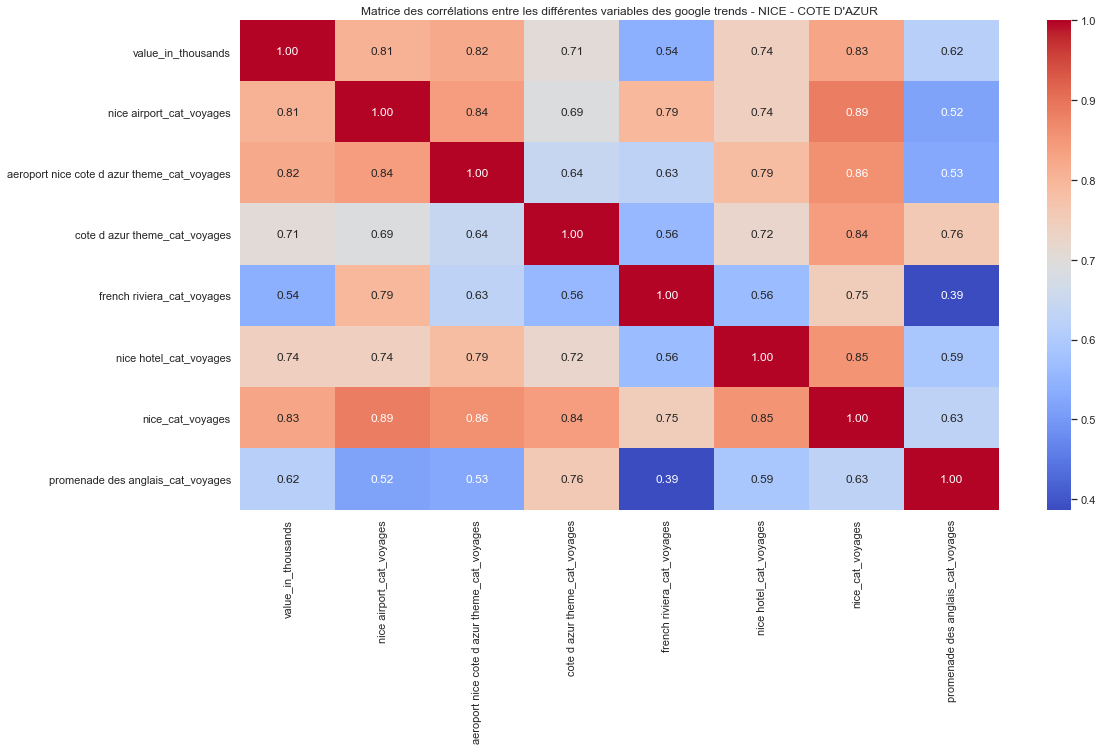

In [46]:
# je définis la taille de la matrice 
sns.set(rc = {'figure.figsize':(17,9)})
# Je veux deux chiffres après la virgule
sns.heatmap(df_nice.corr(), cmap='coolwarm', annot=True, fmt=".2f") 
plt.title("Matrice des corrélations entre les différentes variables des google trends - NICE - COTE D'AZUR")

# Seine-et-Marne (Disneyland)

## LASSO

In [47]:
# je définis mon vecteur cible y ( à prédire) et mes variables (X, les google trends) 
# et je les convertis en vecteur pour pouvoir appliquer le Lasso
y=df_seine["value_in_thousands"].to_numpy()
X=df_seine.drop(["value_in_thousands"], axis = 1).to_numpy()

# je sépare mon échantillon
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=12)

pipeline = Pipeline([
                     ('scaler',StandardScaler()),
                     ('model',Lasso())
])

# on veut optimiser notre hyperparamètre alpha
search = GridSearchCV(pipeline,
                      {'model__alpha':np.arange(0.1,10,0.1)},
                      cv = 5, scoring="neg_mean_squared_error",verbose=3
                      )

In [48]:
# entrainement 
search.fit(X_train,y_train)
search.best_params_
coefficients = search.best_estimator_.named_steps['model'].coef_
importance = np.abs(coefficients)
importance

Fitting 5 folds for each of 99 candidates, totalling 495 fits
[CV] model__alpha=0.1 ................................................
[CV] ............... model__alpha=0.1, score=-27834.442, total=   0.0s
[CV] model__alpha=0.1 ................................................
[CV] ............... model__alpha=0.1, score=-24842.110, total=   0.0s
[CV] model__alpha=0.1 ................................................
[CV] ................ model__alpha=0.1, score=-6069.135, total=   0.0s
[CV] model__alpha=0.1 ................................................
[CV] ................ model__alpha=0.1, score=-8214.530, total=   0.0s
[CV] model__alpha=0.1 ................................................
[CV] ............... model__alpha=0.1, score=-13757.145, total=   0.0s
[CV] model__alpha=0.2 ................................................
[CV] ............... model__alpha=0.2, score=-27925.367, total=   0.0s
[CV] model__alpha=0.2 ................................................
[CV] ..........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] ............... model__alpha=0.6, score=-24826.706, total=   0.0s
[CV] model__alpha=0.6 ................................................
[CV] ................ model__alpha=0.6, score=-5972.505, total=   0.0s
[CV] model__alpha=0.6 ................................................
[CV] ................ model__alpha=0.6, score=-8091.373, total=   0.0s
[CV] model__alpha=0.6 ................................................
[CV] ............... model__alpha=0.6, score=-13728.261, total=   0.0s
[CV] model__alpha=0.7000000000000001 .................................
[CV]  model__alpha=0.7000000000000001, score=-28421.834, total=   0.0s
[CV] model__alpha=0.7000000000000001 .................................
[CV]  model__alpha=0.7000000000000001, score=-24827.821, total=   0.0s
[CV] model__alpha=0.7000000000000001 .................................
[CV] . model__alpha=0.7000000000000001, score=-5954.091, total=   0.0s
[CV] model__alpha=0.7000000000000001 .................................
[CV] .

[CV]  model__alpha=1.9000000000000001, score=-13861.121, total=   0.0s
[CV] model__alpha=2.0 ................................................
[CV] ............... model__alpha=2.0, score=-28879.433, total=   0.0s
[CV] model__alpha=2.0 ................................................
[CV] ............... model__alpha=2.0, score=-24976.404, total=   0.0s
[CV] model__alpha=2.0 ................................................
[CV] ................ model__alpha=2.0, score=-5741.540, total=   0.0s
[CV] model__alpha=2.0 ................................................
[CV] ................ model__alpha=2.0, score=-7928.186, total=   0.0s
[CV] model__alpha=2.0 ................................................
[CV] ............... model__alpha=2.0, score=-13883.878, total=   0.0s
[CV] model__alpha=2.1 ................................................
[CV] ............... model__alpha=2.1, score=-28875.434, total=   0.0s
[CV] model__alpha=2.1 ................................................
[CV] .

[CV] model__alpha=3.5000000000000004 .................................
[CV]  model__alpha=3.5000000000000004, score=-14078.630, total=   0.0s
[CV] model__alpha=3.6 ................................................
[CV] ............... model__alpha=3.6, score=-28820.394, total=   0.0s
[CV] model__alpha=3.6 ................................................
[CV] ............... model__alpha=3.6, score=-24939.239, total=   0.0s
[CV] model__alpha=3.6 ................................................
[CV] ................ model__alpha=3.6, score=-5548.550, total=   0.0s
[CV] model__alpha=3.6 ................................................
[CV] ................ model__alpha=3.6, score=-7999.885, total=   0.0s
[CV] model__alpha=3.6 ................................................
[CV] ............... model__alpha=3.6, score=-14075.053, total=   0.0s
[CV] model__alpha=3.7 ................................................
[CV] ............... model__alpha=3.7, score=-28816.807, total=   0.0s
[CV] m

[CV] ............... model__alpha=5.2, score=-24823.525, total=   0.0s
[CV] model__alpha=5.2 ................................................
[CV] ................ model__alpha=5.2, score=-5640.703, total=   0.0s
[CV] model__alpha=5.2 ................................................
[CV] ................ model__alpha=5.2, score=-8063.166, total=   0.0s
[CV] model__alpha=5.2 ................................................
[CV] ............... model__alpha=5.2, score=-14022.687, total=   0.0s
[CV] model__alpha=5.3 ................................................
[CV] ............... model__alpha=5.3, score=-28760.867, total=   0.0s
[CV] model__alpha=5.3 ................................................
[CV] ............... model__alpha=5.3, score=-24816.441, total=   0.0s
[CV] model__alpha=5.3 ................................................
[CV] ................ model__alpha=5.3, score=-5661.007, total=   0.0s
[CV] model__alpha=5.3 ................................................
[CV] .

[CV] ............... model__alpha=6.4, score=-13987.853, total=   0.0s
[CV] model__alpha=6.5 ................................................
[CV] ............... model__alpha=6.5, score=-28720.721, total=   0.0s
[CV] model__alpha=6.5 ................................................
[CV] ............... model__alpha=6.5, score=-24732.793, total=   0.0s
[CV] model__alpha=6.5 ................................................
[CV] ................ model__alpha=6.5, score=-5908.288, total=   0.0s
[CV] model__alpha=6.5 ................................................
[CV] ................ model__alpha=6.5, score=-8116.873, total=   0.0s
[CV] model__alpha=6.5 ................................................
[CV] ............... model__alpha=6.5, score=-13985.146, total=   0.0s
[CV] model__alpha=6.6 ................................................
[CV] ............... model__alpha=6.6, score=-28717.446, total=   0.0s
[CV] model__alpha=6.6 ................................................
[CV] .

[CV] ................ model__alpha=7.6, score=-8163.922, total=   0.0s
[CV] model__alpha=7.6 ................................................
[CV] ............... model__alpha=7.6, score=-13957.357, total=   0.0s
[CV] model__alpha=7.7 ................................................
[CV] ............... model__alpha=7.7, score=-28682.126, total=   0.0s
[CV] model__alpha=7.7 ................................................
[CV] ............... model__alpha=7.7, score=-24651.653, total=   0.0s
[CV] model__alpha=7.7 ................................................
[CV] ................ model__alpha=7.7, score=-6162.270, total=   0.0s
[CV] model__alpha=7.7 ................................................
[CV] ................ model__alpha=7.7, score=-8168.272, total=   0.0s
[CV] model__alpha=7.7 ................................................
[CV] ............... model__alpha=7.7, score=-13955.011, total=   0.0s
[CV] model__alpha=7.8 ................................................
[CV] .

[CV] ................ model__alpha=8.8, score=-6400.974, total=   0.0s
[CV] model__alpha=8.8 ................................................
[CV] ................ model__alpha=8.8, score=-8216.926, total=   0.0s
[CV] model__alpha=8.8 ................................................
[CV] ............... model__alpha=8.8, score=-13931.198, total=   0.0s
[CV] model__alpha=8.9 ................................................
[CV] ............... model__alpha=8.9, score=-28645.082, total=   0.0s
[CV] model__alpha=8.9 ................................................
[CV] ............... model__alpha=8.9, score=-24573.020, total=   0.0s
[CV] model__alpha=8.9 ................................................
[CV] ................ model__alpha=8.9, score=-6422.953, total=   0.0s
[CV] model__alpha=8.9 ................................................
[CV] ................ model__alpha=8.9, score=-8221.422, total=   0.0s
[CV] model__alpha=8.9 ................................................
[CV] .

[Parallel(n_jobs=1)]: Done 495 out of 495 | elapsed:    3.5s finished


array([ 91.16148569, 106.57553505,  66.88856955])

In [49]:
# entrainement 
search.fit(X_test,y_test)
search.best_params_
coefficients = search.best_estimator_.named_steps['model'].coef_
importance = np.abs(coefficients)
importance

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


Fitting 5 folds for each of 99 candidates, totalling 495 fits
[CV] model__alpha=0.1 ................................................
[CV] ................ model__alpha=0.1, score=-2277.017, total=   0.0s
[CV] model__alpha=0.1 ................................................
[CV] ............... model__alpha=0.1, score=-35191.921, total=   0.0s
[CV] model__alpha=0.1 ................................................
[CV] ............... model__alpha=0.1, score=-11352.063, total=   0.0s
[CV] model__alpha=0.1 ................................................
[CV] ............... model__alpha=0.1, score=-13967.292, total=   0.0s
[CV] model__alpha=0.1 ................................................
[CV] ............... model__alpha=0.1, score=-10092.168, total=   0.0s
[CV] model__alpha=0.2 ................................................
[CV] ................ model__alpha=0.2, score=-2574.994, total=   0.0s
[CV] model__alpha=0.2 ................................................
[CV] ..........

[CV] model__alpha=1.7000000000000002 .................................
[CV]  model__alpha=1.7000000000000002, score=-10103.139, total=   0.0s
[CV] model__alpha=1.7000000000000002 .................................
[CV]  model__alpha=1.7000000000000002, score=-14643.766, total=   0.0s
[CV] model__alpha=1.7000000000000002 .................................
[CV] . model__alpha=1.7000000000000002, score=-8716.395, total=   0.0s
[CV] model__alpha=1.8000000000000003 .................................
[CV] . model__alpha=1.8000000000000003, score=-2914.013, total=   0.0s
[CV] model__alpha=1.8000000000000003 .................................
[CV]  model__alpha=1.8000000000000003, score=-23621.589, total=   0.0s
[CV] model__alpha=1.8000000000000003 .................................
[CV]  model__alpha=1.8000000000000003, score=-10077.442, total=   0.0s
[CV] model__alpha=1.8000000000000003 .................................
[CV]  model__alpha=1.8000000000000003, score=-14650.421, total=   0.0s
[CV] m

[CV] . model__alpha=3.4000000000000004, score=-8862.530, total=   0.0s
[CV] model__alpha=3.5000000000000004 .................................
[CV] . model__alpha=3.5000000000000004, score=-2834.165, total=   0.0s
[CV] model__alpha=3.5000000000000004 .................................
[CV]  model__alpha=3.5000000000000004, score=-22797.466, total=   0.0s
[CV] model__alpha=3.5000000000000004 .................................
[CV] . model__alpha=3.5000000000000004, score=-9645.712, total=   0.0s
[CV] model__alpha=3.5000000000000004 .................................
[CV]  model__alpha=3.5000000000000004, score=-14771.697, total=   0.0s
[CV] model__alpha=3.5000000000000004 .................................
[CV] . model__alpha=3.5000000000000004, score=-8874.677, total=   0.0s
[CV] model__alpha=3.6 ................................................
[CV] ................ model__alpha=3.6, score=-2829.580, total=   0.0s
[CV] model__alpha=3.6 ................................................
[CV] .

[CV] ............... model__alpha=4.7, score=-22720.193, total=   0.0s
[CV] model__alpha=4.7 ................................................
[CV] ................ model__alpha=4.7, score=-9348.685, total=   0.0s
[CV] model__alpha=4.7 ................................................
[CV] ............... model__alpha=4.7, score=-14866.564, total=   0.0s
[CV] model__alpha=4.7 ................................................
[CV] ................ model__alpha=4.7, score=-9021.528, total=   0.0s
[CV] model__alpha=4.8 ................................................
[CV] ................ model__alpha=4.8, score=-2775.537, total=   0.0s
[CV] model__alpha=4.8 ................................................
[CV] ............... model__alpha=4.8, score=-22713.928, total=   0.0s
[CV] model__alpha=4.8 ................................................
[CV] ................ model__alpha=4.8, score=-9324.221, total=   0.0s
[CV] model__alpha=4.8 ................................................
[CV] .

[CV] ............... model__alpha=6.2, score=-22629.043, total=   0.0s
[CV] model__alpha=6.2 ................................................
[CV] ................ model__alpha=6.2, score=-8986.371, total=   0.0s
[CV] model__alpha=6.2 ................................................
[CV] ............... model__alpha=6.2, score=-14995.924, total=   0.0s
[CV] model__alpha=6.2 ................................................
[CV] ................ model__alpha=6.2, score=-9207.932, total=   0.0s
[CV] model__alpha=6.3 ................................................
[CV] ................ model__alpha=6.3, score=-2710.509, total=   0.0s
[CV] model__alpha=6.3 ................................................
[CV] ............... model__alpha=6.3, score=-22623.181, total=   0.0s
[CV] model__alpha=6.3 ................................................
[CV] ................ model__alpha=6.3, score=-8962.571, total=   0.0s
[CV] model__alpha=6.3 ................................................
[CV] .

[CV] ................ model__alpha=7.9, score=-9423.004, total=   0.0s
[CV] model__alpha=8.0 ................................................
[CV] ................ model__alpha=8.0, score=-2640.203, total=   0.0s
[CV] model__alpha=8.0 ................................................
[CV] ............... model__alpha=8.0, score=-22527.643, total=   0.0s
[CV] model__alpha=8.0 ................................................
[CV] ................ model__alpha=8.0, score=-8564.751, total=   0.0s
[CV] model__alpha=8.0 ................................................
[CV] ............... model__alpha=8.0, score=-15166.962, total=   0.0s
[CV] model__alpha=8.0 ................................................
[CV] ................ model__alpha=8.0, score=-9435.782, total=   0.0s
[CV] model__alpha=8.1 ................................................
[CV] ................ model__alpha=8.1, score=-2636.180, total=   0.0s
[CV] model__alpha=8.1 ................................................
[CV] .

[CV] ................ model__alpha=9.1, score=-9577.261, total=   0.0s
[CV] model__alpha=9.2 ................................................
[CV] ................ model__alpha=9.2, score=-2592.746, total=   0.0s
[CV] model__alpha=9.2 ................................................
[CV] ............... model__alpha=9.2, score=-22464.880, total=   0.0s
[CV] model__alpha=9.2 ................................................
[CV] ................ model__alpha=9.2, score=-8291.645, total=   0.0s
[CV] model__alpha=9.2 ................................................
[CV] ............... model__alpha=9.2, score=-15290.567, total=   0.0s
[CV] model__alpha=9.2 ................................................
[CV] ................ model__alpha=9.2, score=-9590.206, total=   0.0s
[CV] model__alpha=9.3 ................................................
[CV] ................ model__alpha=9.3, score=-2588.873, total=   0.0s
[CV] model__alpha=9.3 ................................................
[CV] .

[Parallel(n_jobs=1)]: Done 495 out of 495 | elapsed:    3.0s finished


array([77.77570037, 72.31557036,  0.        ])

BILAN: 2 des 3 GT sont pertinents ici:
- 1: disneyland_paris hotel_cat_voyages
- 2: disneyland paris theme_cat_voyages

disneyland_paris_cat_voyages n'est pas utile.

## RL Seine et marne 

In [50]:
X = sm.add_constant(df_seine.drop(["value_in_thousands"], axis = 1))
results = sm.OLS(df_seine["value_in_thousands"], X).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:     value_in_thousands   R-squared:                       0.621
Model:                            OLS   Adj. R-squared:                  0.600
Method:                 Least Squares   F-statistic:                     29.45
Date:                Thu, 07 Apr 2022   Prob (F-statistic):           2.04e-11
Time:                        11:39:35   Log-Likelihood:                -354.11
No. Observations:                  58   AIC:                             716.2
Df Residuals:                      54   BIC:                             724.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

## Matrice des corrélations - seine et marne

Text(0.5, 1.0, 'Matrice des corrélations entre les différentes variables des google trends -SEINE ET MARNE (DISNEY)')

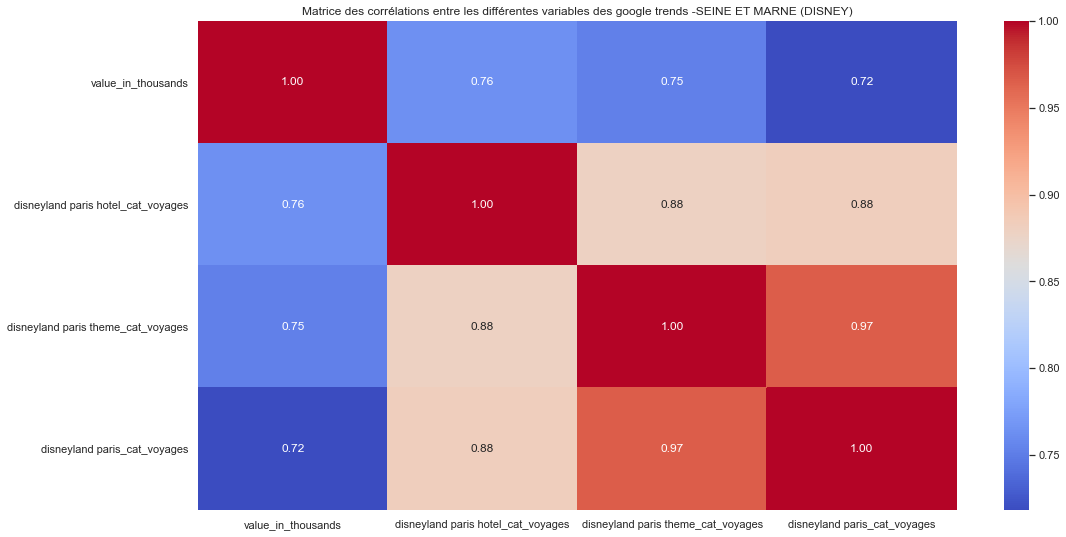

In [51]:
# je définis la taille de la matrice 
sns.set(rc = {'figure.figsize':(17,9)})
# Je veux deux chiffres après la virgule
sns.heatmap(df_seine.corr(), cmap='coolwarm', annot=True, fmt=".2f") 
plt.title("Matrice des corrélations entre les différentes variables des google trends -SEINE ET MARNE (DISNEY)")

# On fait une moyenne des gt pertinents journaliers 

In [52]:
df_gt2.head(5)

variable,date,aeroport nice cote d azur theme_cat_voyages,aeroport paris_cat_voyages,cote d azur theme_cat_voyages,disneyland paris hotel_cat_voyages,disneyland paris theme_cat_voyages,disneyland paris_cat_voyages,french riviera_cat_voyages,louvre_cat_voyages,lyon gare_cat_voyages,...,nice hotel_cat_voyages,nice_cat_voyages,paris gare_cat_voyages,paris hotel_cat_voyages,paris restaurant_cat_voyages,paris_cat_voyages,promenade des anglais_cat_voyages,Year,Month,Year-Month
0,2017-01-01,7.03,9.00,7.79,50.32,35.51,52.92,0.0,13.11,12.00,...,4.03,22.88,26.79,15.18,7.04,38.70,0.0,2017,1,2017-01-01
1,2017-01-02,13.87,3.78,22.96,23.12,47.17,56.07,0.0,9.43,30.24,...,10.23,26.84,22.23,20.47,11.44,39.99,4.0,2017,1,2017-01-01
2,2017-01-03,13.30,3.96,15.58,51.00,39.22,47.88,0.0,4.37,25.92,...,16.12,25.08,31.92,16.10,44.00,35.69,0.0,2017,1,2017-01-01
3,2017-01-04,15.20,2.79,12.30,29.24,35.51,44.10,0.0,8.97,38.40,...,22.63,26.84,21.09,23.00,33.00,35.69,0.0,2017,1,2017-01-01
4,2017-01-05,15.39,3.24,15.99,55.76,34.45,39.69,0.0,9.20,12.96,...,13.02,21.12,35.91,15.41,33.44,34.83,0.0,2017,1,2017-01-01


In [59]:
df_gt4_jour = df_gt2[['aeroport nice cote d azur theme_cat_voyages',
       'aeroport paris_cat_voyages', 'cote d azur theme_cat_voyages',
       'disneyland paris hotel_cat_voyages',
       'disneyland paris theme_cat_voyages', 'disneyland paris_cat_voyages',
       'french riviera_cat_voyages', 'louvre_cat_voyages',
       'lyon gare_cat_voyages', 'lyon hotel_cat_voyages', 'lyon_cat_voyages',
       'marseille gare_cat_voyages', 'marseille hotel_cat_voyages',
       'marseille restaurant_cat_voyages', 'marseille station_cat_voyages',
       'marseille vieux port_cat_voyages', 'marseille_cat_voyages',
       'mucem theme', 'nice airport_cat_voyages', 'nice hotel_cat_voyages',
       'nice_cat_voyages', 'paris gare_cat_voyages', 'paris hotel_cat_voyages',
       'paris restaurant_cat_voyages', 'paris_cat_voyages',
       'promenade des anglais_cat_voyages']]

df_gt5_jour = df_gt2[["date"]]

In [60]:
from sklearn.preprocessing import MinMaxScaler

In [61]:
X_std_jour = (df_gt4_jour - df_gt4_jour.min(axis=0)) / (df_gt4_jour.max(axis=0) - df_gt4_jour.min(axis=0))

In [67]:
df_gt2_stand= X_std_jour.merge(df_gt5_jour, how='inner', left_index=True, right_index=True)
df_gt2_stand.set_index('date', inplace=True, drop=True)

In [70]:
df_gt2_stand

variable,aeroport nice cote d azur theme_cat_voyages,aeroport paris_cat_voyages,cote d azur theme_cat_voyages,disneyland paris hotel_cat_voyages,disneyland paris theme_cat_voyages,disneyland paris_cat_voyages,french riviera_cat_voyages,louvre_cat_voyages,lyon gare_cat_voyages,lyon hotel_cat_voyages,...,marseille_cat_voyages,mucem theme,nice airport_cat_voyages,nice hotel_cat_voyages,nice_cat_voyages,paris gare_cat_voyages,paris hotel_cat_voyages,paris restaurant_cat_voyages,paris_cat_voyages,promenade des anglais_cat_voyages
date,,,,,,,,,,,,,,,,,,,,,
2017-01-01,0.159773,0.692308,0.086556,0.578391,0.553062,0.685301,0.0000,0.409687,0.134831,0.386122,...,0.376684,0.210000,0.153571,0.087609,0.245768,0.291196,0.576359,0.113548,0.674260,0.0
2017-01-02,0.315227,0.290769,0.255111,0.265747,0.749789,0.728252,0.0000,0.294687,0.339775,0.263265,...,0.515294,0.090000,0.257143,0.222391,0.307837,0.241630,0.804573,0.184516,0.701725,0.1
2017-01-03,0.302273,0.304615,0.173111,0.586207,0.615657,0.616580,0.0000,0.136563,0.291236,0.491429,...,0.370909,0.000000,0.160714,0.350435,0.280251,0.346957,0.616048,0.709677,0.610177,0.0
2017-01-04,0.345455,0.214615,0.136667,0.336092,0.553062,0.565040,0.0000,0.280313,0.431461,0.675714,...,0.399786,0.000000,0.121429,0.491957,0.307837,0.229239,0.913719,0.532258,0.610177,0.0
2017-01-05,0.349773,0.249231,0.177667,0.640920,0.535178,0.504909,0.0000,0.287500,0.145618,0.377347,...,0.561497,0.085000,0.125000,0.283043,0.218182,0.390326,0.586281,0.539355,0.591867,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-27,0.168409,0.276923,0.109333,0.136552,0.540746,0.513499,0.1924,0.421875,0.339775,0.297143,...,0.125775,0.278571,0.073810,0.167391,0.188088,0.456522,0.386540,0.546452,0.425165,0.0
2021-12-28,0.118182,0.307692,0.080000,0.155172,0.578201,0.493864,0.1872,0.445312,0.539326,0.508571,...,0.104920,0.000000,0.047619,0.164348,0.117555,0.255652,0.386540,0.631613,0.327443,0.0
2021-12-29,0.215682,0.346154,0.192000,0.235862,0.509533,0.533133,0.1924,0.356250,0.080899,0.520000,...,0.092406,0.188571,0.097619,0.292174,0.122257,0.424565,0.367558,0.461290,0.350436,0.0


## PARIS

<ipython-input-71-2c699ac7b79e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gt_paris_moy["moyenne_gt_paris"]=(gt_paris_moy["paris gare_cat_voyages"]+gt_paris_moy["aeroport paris_cat_voyages"]+gt_paris_moy["paris_cat_voyages"]+gt_paris_moy["louvre_cat_voyages"])/4
No handles with labels found to put in legend.


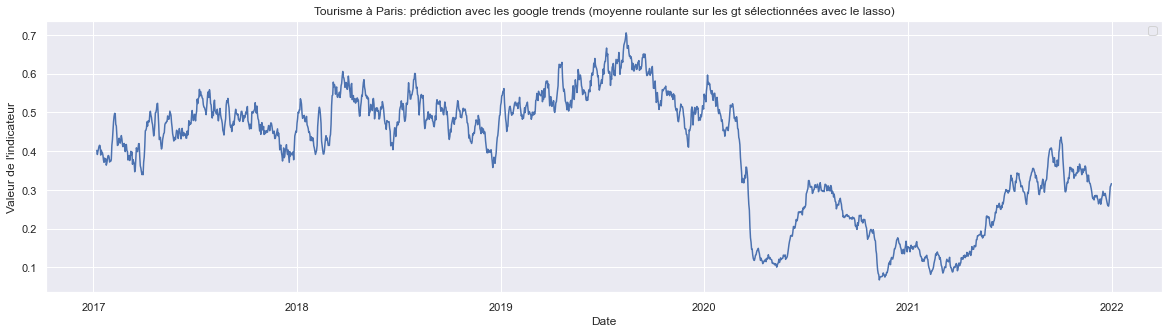

In [71]:
# on sélectionne les variables pour paris
gt_paris_moy=df_gt2_stand[["paris gare_cat_voyages","aeroport paris_cat_voyages","paris_cat_voyages","louvre_cat_voyages"]]
gt_paris_moy["moyenne_gt_paris"]=(gt_paris_moy["paris gare_cat_voyages"]+gt_paris_moy["aeroport paris_cat_voyages"]+gt_paris_moy["paris_cat_voyages"]+gt_paris_moy["louvre_cat_voyages"])/4
gt_paris_moy=gt_paris_moy.reset_index()

#on représente graphiquement
x=gt_paris_moy[["date"]]
y=gt_paris_moy[["moyenne_gt_paris"]]
z = rolling_mean = gt_paris_moy["moyenne_gt_paris"].rolling(window = 7).mean()
fig = plt.figure(1, figsize=(20, 5))
plt.plot(x, z)
plt.title('Tourisme à Paris: prédiction avec les google trends (moyenne roulante sur les gt sélectionnées avec le lasso)')
plt.xlabel('Date')
plt.ylabel("Valeur de l'indicateur")
plt.legend()

## LYON

<ipython-input-72-771ff7117256>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gt_lyon_moy["moyenne_gt_lyon"]=(gt_lyon_moy["lyon hotel_cat_voyages"]+gt_lyon_moy["lyon gare_cat_voyages"])/2
No handles with labels found to put in legend.


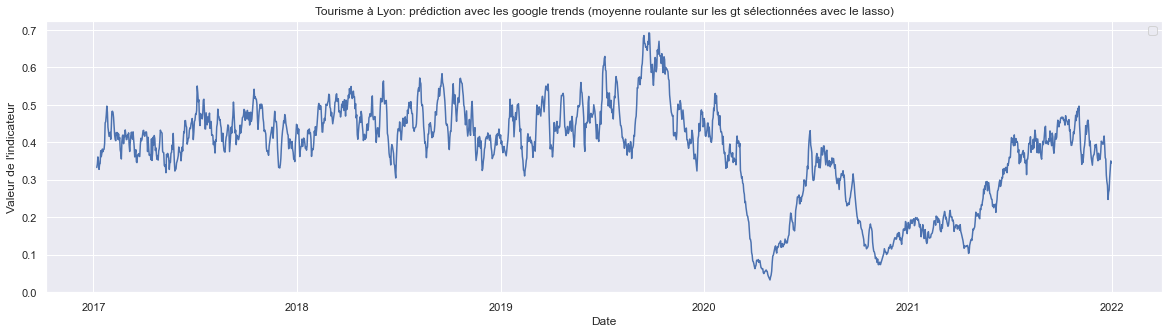

In [72]:
# on sélectionne les variables pour lyon
gt_lyon_moy=df_gt2_stand[["lyon hotel_cat_voyages","lyon gare_cat_voyages"]]
gt_lyon_moy["moyenne_gt_lyon"]=(gt_lyon_moy["lyon hotel_cat_voyages"]+gt_lyon_moy["lyon gare_cat_voyages"])/2
gt_lyon_moy=gt_lyon_moy.reset_index()

#on représente graphiquement
x=gt_lyon_moy[["date"]]
y=gt_lyon_moy[["moyenne_gt_lyon"]]
z = rolling_mean = gt_lyon_moy["moyenne_gt_lyon"].rolling(window = 7).mean()
fig = plt.figure(1, figsize=(20, 5))
plt.plot(x, z)
plt.title('Tourisme à Lyon: prédiction avec les google trends (moyenne roulante sur les gt sélectionnées avec le lasso)')
plt.xlabel('Date')
plt.ylabel("Valeur de l'indicateur")
plt.legend()

## MARSEILLE

<ipython-input-73-76755834fbb8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gt_mars_moy["moyenne_gt_marseille"]=(gt_mars_moy["marseille gare_cat_voyages"]+gt_mars_moy["marseille_cat_voyages"]+gt_mars_moy["marseille station_cat_voyages"]+gt_mars_moy["marseille vieux port_cat_voyages"])/4
No handles with labels found to put in legend.


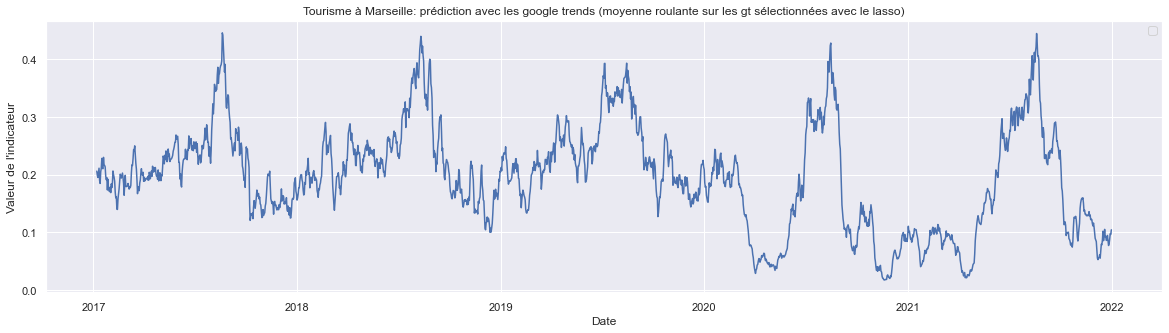

In [73]:
# on sélectionne les variables pour marseille
gt_mars_moy=df_gt2_stand[["marseille gare_cat_voyages","marseille_cat_voyages","marseille station_cat_voyages","marseille vieux port_cat_voyages"]]
gt_mars_moy["moyenne_gt_marseille"]=(gt_mars_moy["marseille gare_cat_voyages"]+gt_mars_moy["marseille_cat_voyages"]+gt_mars_moy["marseille station_cat_voyages"]+gt_mars_moy["marseille vieux port_cat_voyages"])/4
gt_mars_moy=gt_mars_moy.reset_index()

#on représente graphiquement
x=gt_mars_moy[["date"]]
y=gt_mars_moy[["moyenne_gt_marseille"]]
z = rolling_mean = gt_mars_moy["moyenne_gt_marseille"].rolling(window = 7).mean()
fig = plt.figure(1, figsize=(20, 5))
plt.plot(x, z)
plt.title('Tourisme à Marseille: prédiction avec les google trends (moyenne roulante sur les gt sélectionnées avec le lasso)')
plt.xlabel('Date')
plt.ylabel("Valeur de l'indicateur")
plt.legend()

Bizarre... gros pic après le covid. Je vais comparer ces résultats aux données officielles. (juste en dessous). OK 

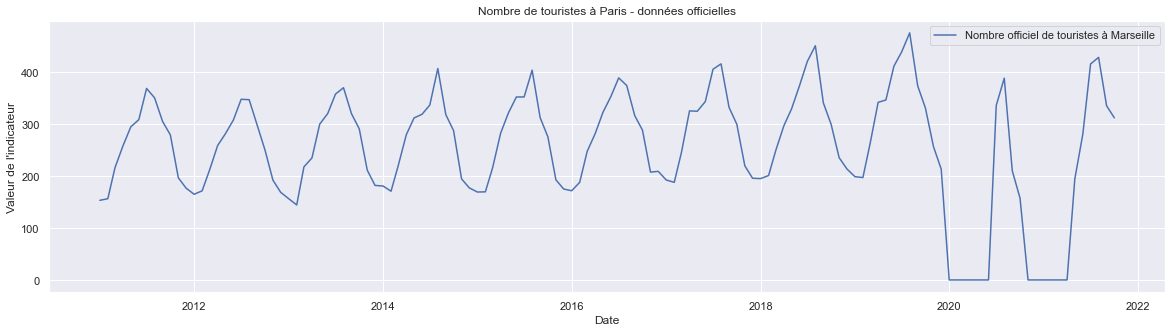

In [74]:
x=df_Official_Data_Marseille[["date"]]
y=df_Official_Data_Marseille[["value_in_thousands"]]
fig = plt.figure(1, figsize=(20, 5))
plt.plot(x, y, label="Nombre officiel de touristes à Marseille")
plt.title('Nombre de touristes à Paris - données officielles')
plt.xlabel('Date')
plt.ylabel("Valeur de l'indicateur")
plt.legend() 

## NICE

<ipython-input-75-b40698fbe83b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gt_nice_moy["moyenne_gt_nice"]=(gt_nice_moy["nice airport_cat_voyages"]+gt_nice_moy["aeroport nice cote d azur theme_cat_voyages"]+gt_nice_moy["nice hotel_cat_voyages"]+gt_nice_moy["promenade des anglais_cat_voyages"]+gt_nice_moy["cote d azur theme_cat_voyages"])/5
No handles with labels found to put in legend.


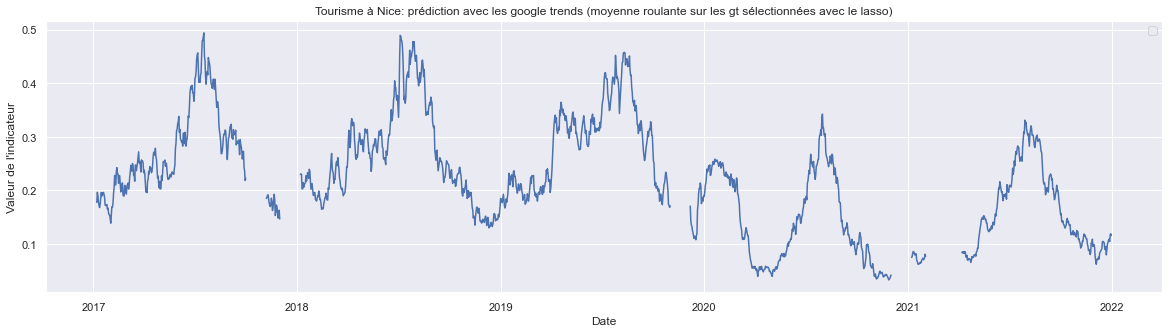

In [75]:
# on sélectionne les variables pour nice
gt_nice_moy=df_gt2_stand[["nice airport_cat_voyages","aeroport nice cote d azur theme_cat_voyages","nice hotel_cat_voyages","promenade des anglais_cat_voyages", "cote d azur theme_cat_voyages"]]
gt_nice_moy["moyenne_gt_nice"]=(gt_nice_moy["nice airport_cat_voyages"]+gt_nice_moy["aeroport nice cote d azur theme_cat_voyages"]+gt_nice_moy["nice hotel_cat_voyages"]+gt_nice_moy["promenade des anglais_cat_voyages"]+gt_nice_moy["cote d azur theme_cat_voyages"])/5
gt_nice_moy=gt_nice_moy.reset_index()

#on représente graphiquement
x=gt_nice_moy[["date"]]
y=gt_nice_moy[["moyenne_gt_nice"]]
z = rolling_mean = gt_nice_moy["moyenne_gt_nice"].rolling(window = 7).mean()
fig = plt.figure(1, figsize=(20, 5))
plt.plot(x, z)
plt.title('Tourisme à Nice: prédiction avec les google trends (moyenne roulante sur les gt sélectionnées avec le lasso)')
plt.xlabel('Date')
plt.ylabel("Valeur de l'indicateur")
plt.legend()

In [76]:
gt_nice_moy[gt_nice_moy["date"]=="2021-02-10"]

variable,date,nice airport_cat_voyages,aeroport nice cote d azur theme_cat_voyages,nice hotel_cat_voyages,promenade des anglais_cat_voyages,cote d azur theme_cat_voyages,moyenne_gt_nice
1501,2021-02-10,0.023571,0.075,0.090435,NaN,0.150222,NaN


On a des pb de valeurs manquantes. 

## SEINE ET MARNE - DISNEY

<ipython-input-77-9755a167b447>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gt_disney_moy["moyenne_gt_nice"]=(gt_disney_moy["disneyland paris hotel_cat_voyages"]+gt_disney_moy["disneyland paris theme_cat_voyages"])/2
No handles with labels found to put in legend.


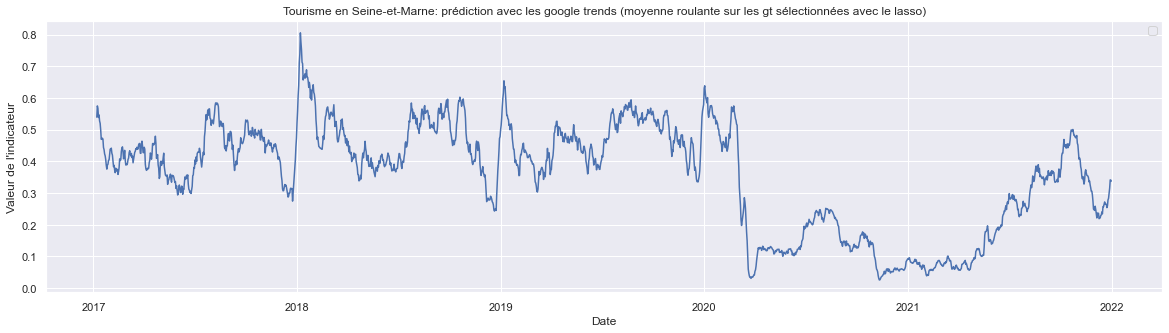

In [77]:
# on sélectionne les variables pour disney
gt_disney_moy=df_gt2_stand[["disneyland paris hotel_cat_voyages","disneyland paris theme_cat_voyages"]]
gt_disney_moy["moyenne_gt_nice"]=(gt_disney_moy["disneyland paris hotel_cat_voyages"]+gt_disney_moy["disneyland paris theme_cat_voyages"])/2
gt_disney_moy=gt_disney_moy.reset_index()

#on représente graphiquement
x=gt_disney_moy[["date"]]
y=gt_disney_moy[["moyenne_gt_nice"]]
z = rolling_mean = gt_disney_moy["moyenne_gt_nice"].rolling(window = 7).mean()
fig = plt.figure(1, figsize=(20, 5))
plt.plot(x, z)
plt.title('Tourisme en Seine-et-Marne: prédiction avec les google trends (moyenne roulante sur les gt sélectionnées avec le lasso)')
plt.xlabel('Date')
plt.ylabel("Valeur de l'indicateur")
plt.legend()